In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
import sys
#PATH = '/content/drive/My Drive/PPM_Stability/'
#PATH = "C:/Users/velmurug/Documents/Stability Experiments/benchmark_interpretability/PPM_Stability/"
PATH = "C:/Users/Mythreyi/Documents/GitHub/Stability-Experiments/benchmark_interpretability/PPM_Stability/"
sys.path.append(PATH)

In [2]:
from DatasetManager import DatasetManager

import pandas as pd
import numpy as np

import os
import sys
from sys import argv
import pickle
import random
import joblib

import statistics

import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset_ref = "bpic2012"
params_dir = PATH + "params"
results_dir = "results"
bucket_method = "prefix"
cls_encoding = "agg"
cls_method = "xgboost"

gap = 1
n_iter = 1

method_name = "%s_%s"%(bucket_method, cls_encoding)

generate_samples = False
generate_lime = True
generate_kernel_shap = False
generate_model_shap = True

sample_size = 2
exp_iter = 10
max_feat = 10

dataset_ref_to_datasets = {
    #"bpic2011": ["bpic2011_f%s"%formula for formula in range(1,5)],
    "bpic2015": ["bpic2015_%s_f2"%(municipality) for municipality in range(5,6)],
    "bpic2017" : ["bpic2017_accepted"],
    "bpic2012" : ["bpic2012_accepted"]
    #"insurance": ["insurance_activity", "insurance_followup"],
    #"sepsis_cases": ["sepsis_cases_1", "sepsis_cases_2", "sepsis_cases_4"]
}

datasets = [dataset_ref] if dataset_ref not in dataset_ref_to_datasets else dataset_ref_to_datasets[dataset_ref]

datasets

['bpic2012_accepted']

Bucket 1
True Negatives
Average LIME Stability: 0.45707070707070707
Average SHAP Stability: 1.0


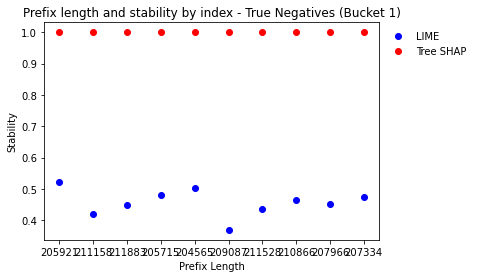

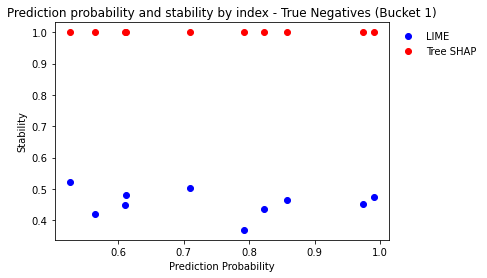

True Positives
Average LIME Stability: 0.45851851851851844
Average SHAP Stability: 1.0


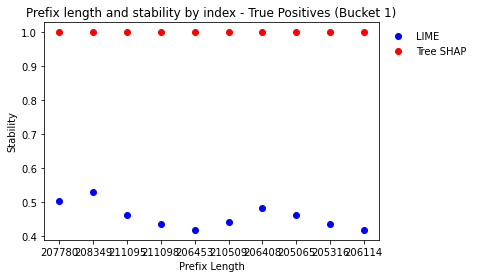

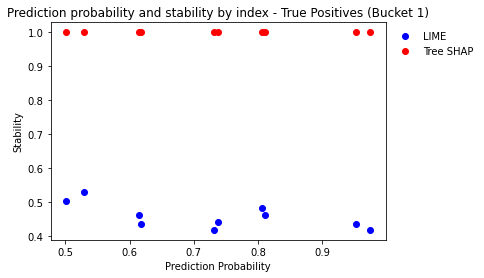

False Negatives
Average LIME Stability: 0.49587205387205385
Average SHAP Stability: 1.0


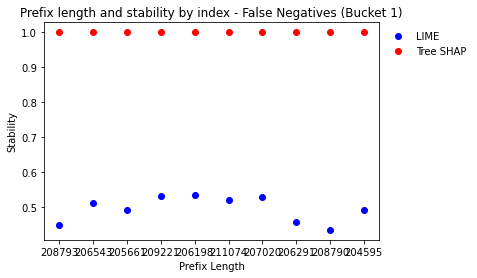

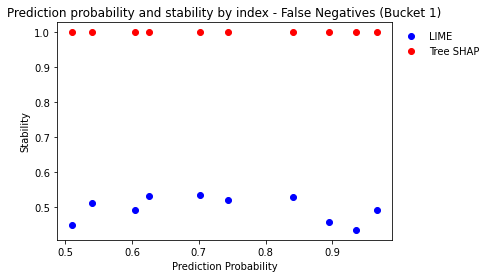

False Positives
Average LIME Stability: 0.4663367003367003
Average SHAP Stability: 1.0


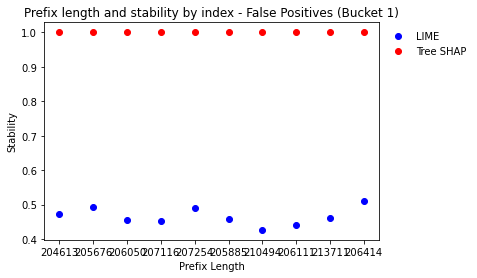

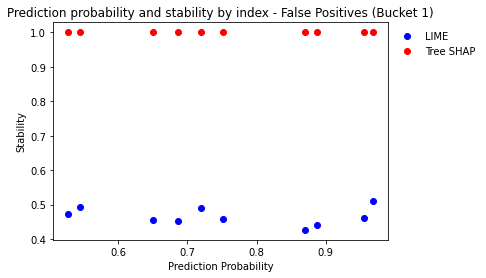

Bucket 2
True Negatives
Average LIME Stability: 0.574954248366013
Average SHAP Stability: 1.0


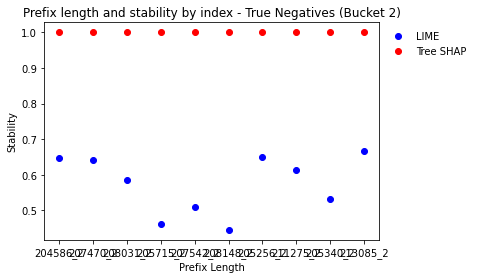

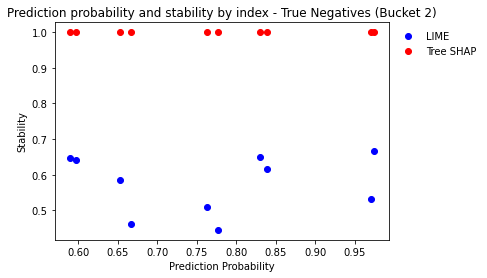

True Positives
Average LIME Stability: 0.5085228758169934
Average SHAP Stability: 1.0


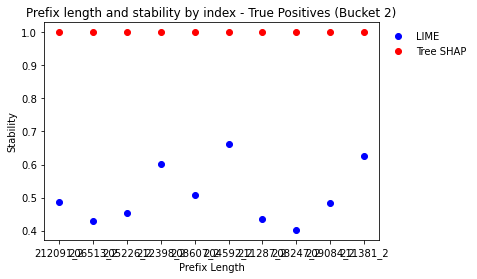

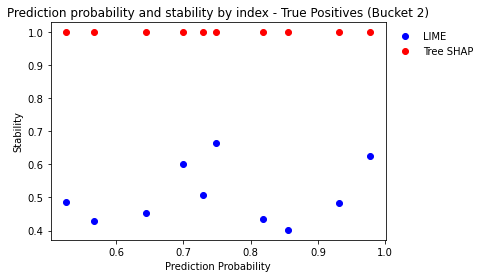

False Negatives
Average LIME Stability: 0.5873202614379085
Average SHAP Stability: 1.0


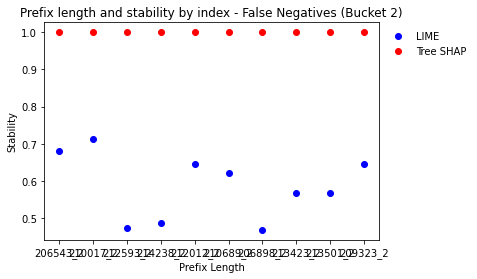

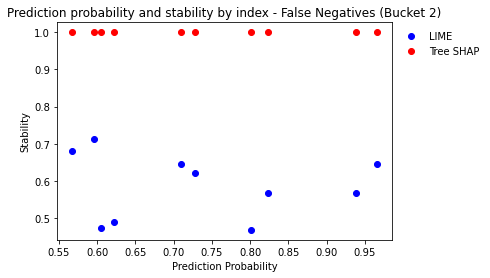

False Positives
Average LIME Stability: 0.5151372549019607
Average SHAP Stability: 1.0


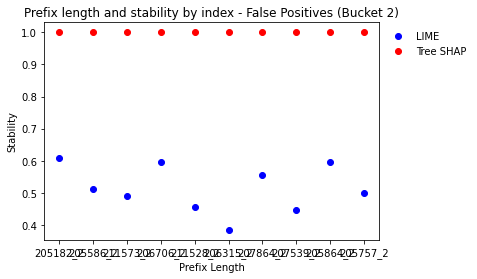

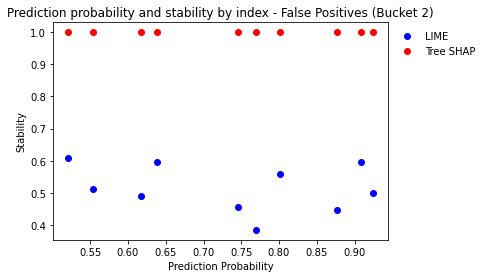

Bucket 3
True Negatives
Average LIME Stability: 0.6931591591591592
Average SHAP Stability: 1.0


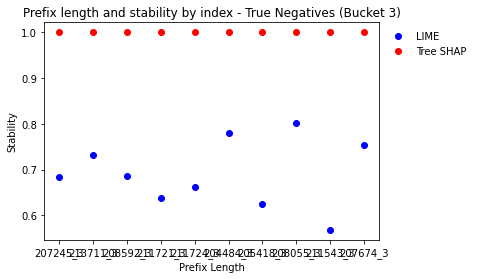

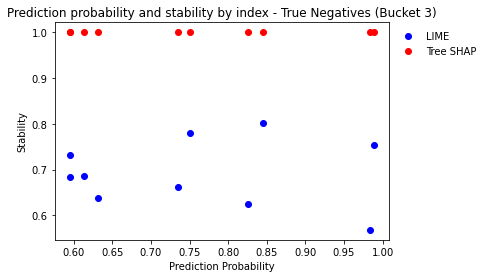

True Positives
Average LIME Stability: 0.6928768768768768
Average SHAP Stability: 1.0


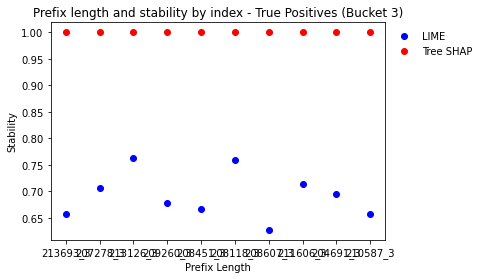

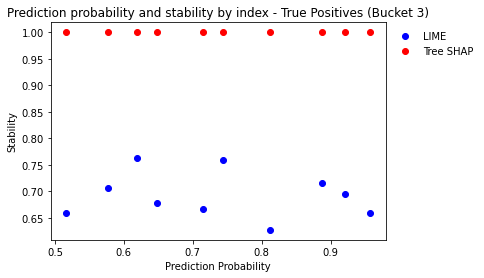

False Negatives
Average LIME Stability: 0.6762222222222222
Average SHAP Stability: 1.0


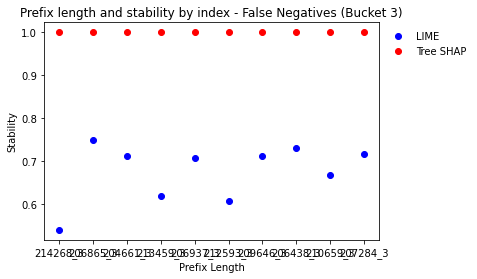

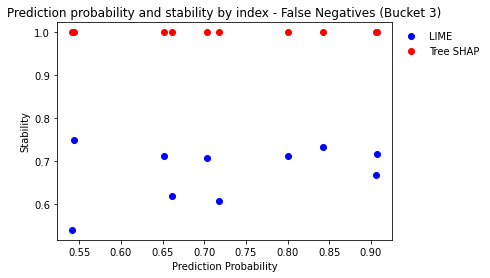

False Positives
Average LIME Stability: 0.6872312312312312
Average SHAP Stability: 1.0


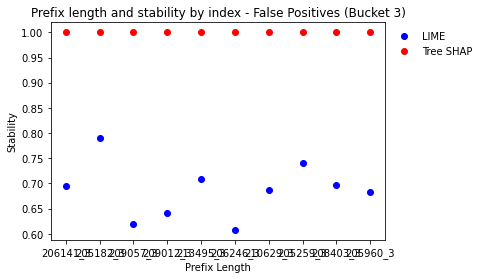

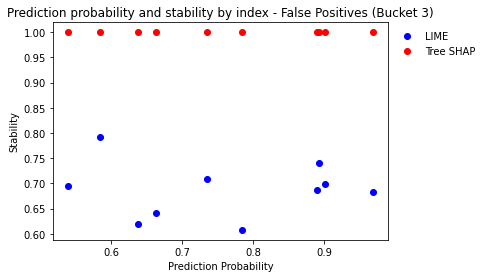

Bucket 4
True Negatives
Average LIME Stability: 0.3304999999999999
Average SHAP Stability: 1.0


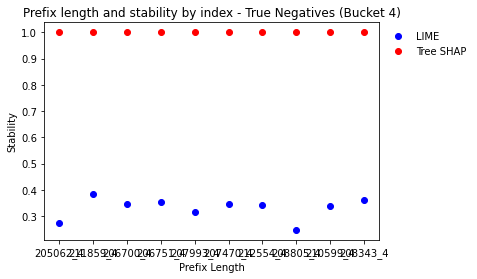

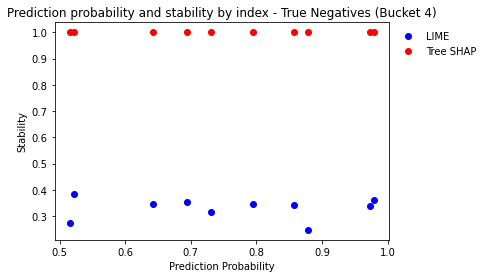

True Positives
Average LIME Stability: 0.3284999999999999
Average SHAP Stability: 1.0


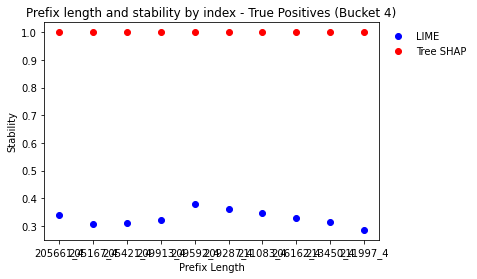

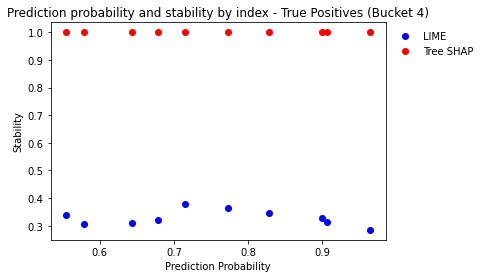

False Negatives
Average LIME Stability: 0.32949999999999996
Average SHAP Stability: 1.0


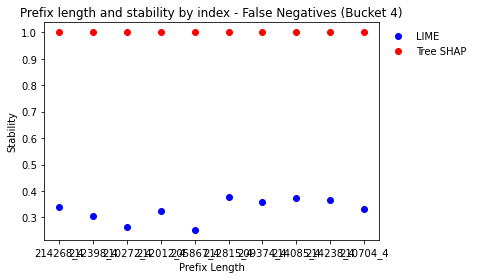

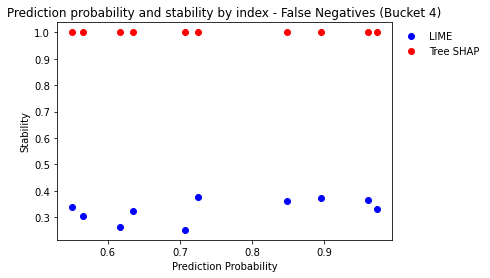

False Positives
Average LIME Stability: 0.3244999999999999
Average SHAP Stability: 1.0


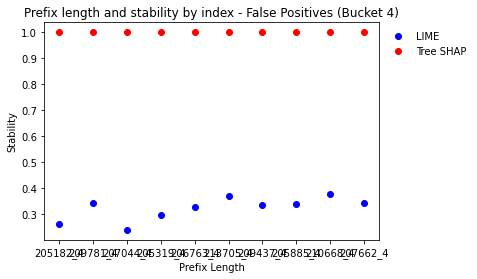

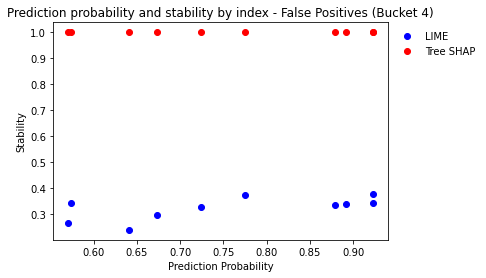

Bucket 5
True Negatives
Average LIME Stability: 0.4822127659574468
Average SHAP Stability: 1.0


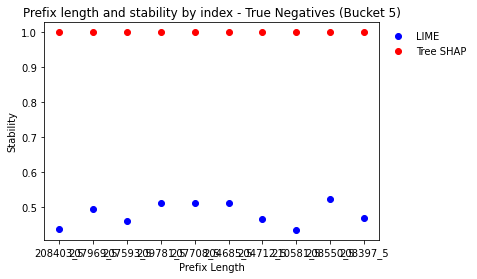

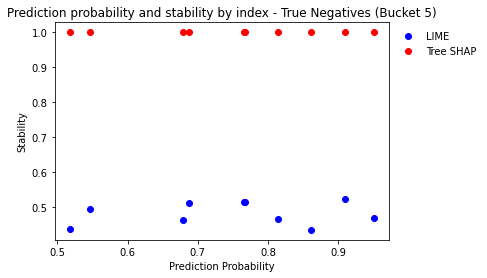

True Positives
Average LIME Stability: 0.4797541371158392
Average SHAP Stability: 1.0


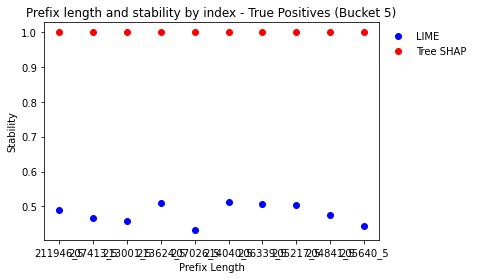

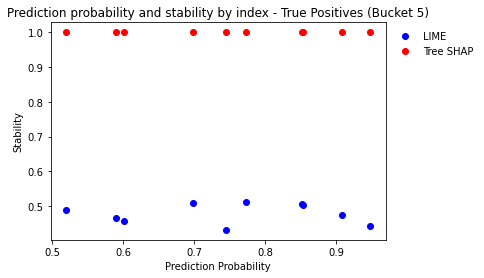

False Negatives
Average LIME Stability: 0.48811347517730497
Average SHAP Stability: 1.0


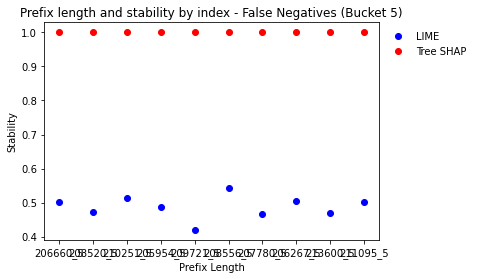

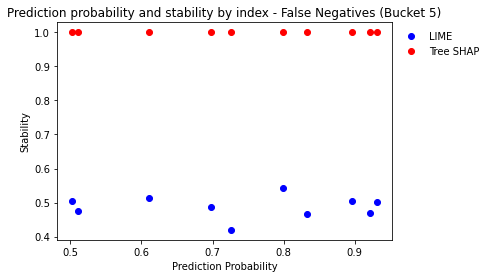

False Positives
Average LIME Stability: 0.49499763593380613
Average SHAP Stability: 1.0


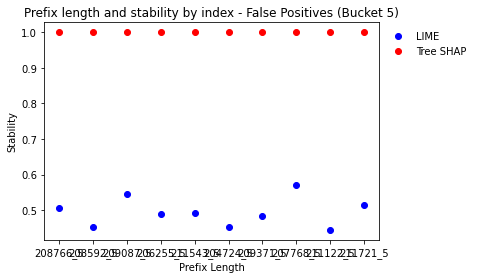

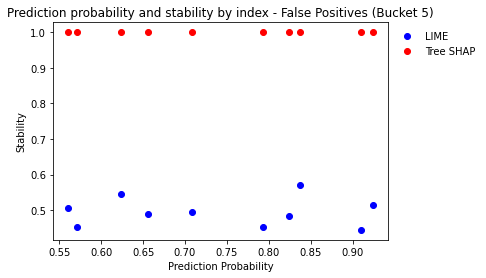

Bucket 6
True Negatives
Average LIME Stability: 0.5166203703703703
Average SHAP Stability: 1.0


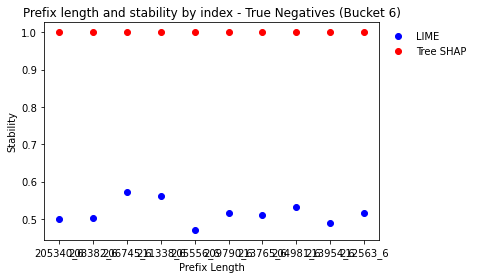

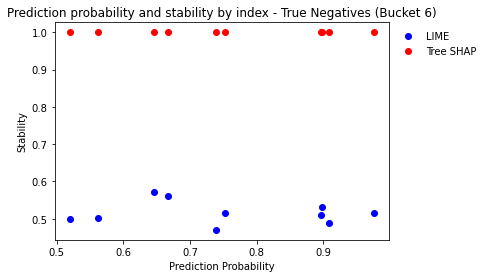

True Positives
Average LIME Stability: 0.5232453703703703
Average SHAP Stability: 1.0


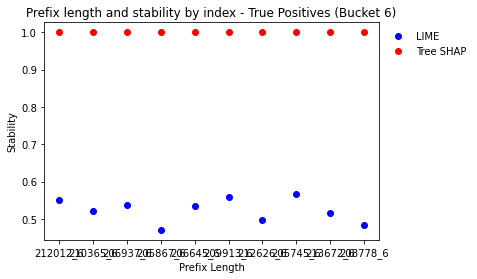

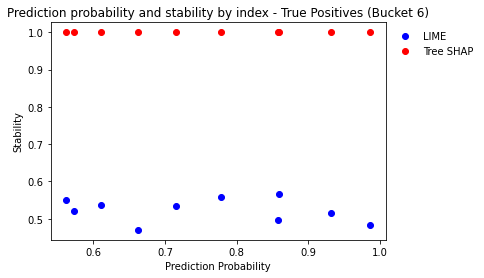

False Negatives
Average LIME Stability: 0.5102407407407408
Average SHAP Stability: 1.0


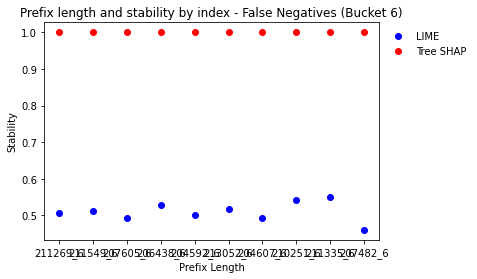

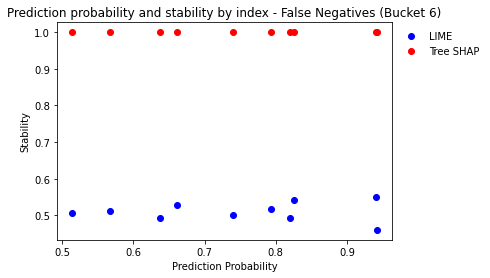

False Positives
Average LIME Stability: 0.5156388888888889
Average SHAP Stability: 1.0


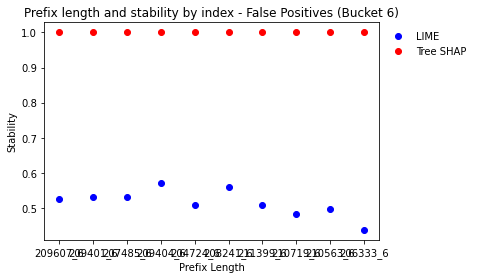

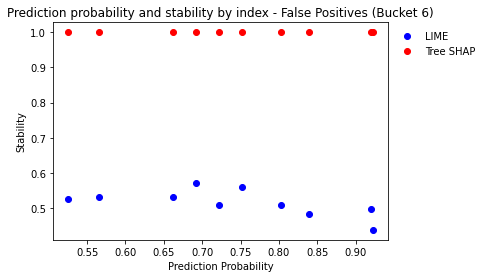

Bucket 7
True Negatives
Average LIME Stability: 0.4656326530612244
Average SHAP Stability: 1.0


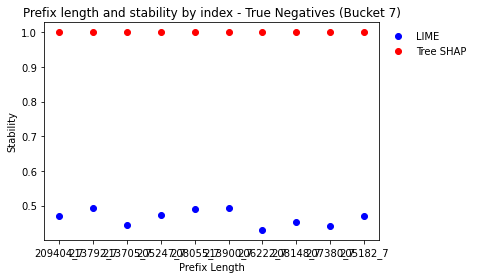

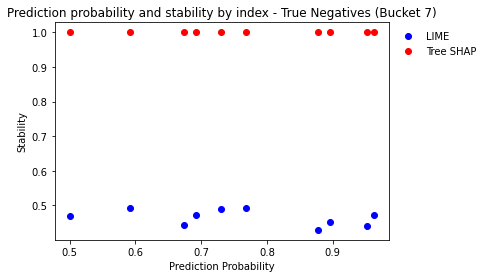

True Positives
Average LIME Stability: 0.49526530612244896
Average SHAP Stability: 1.0


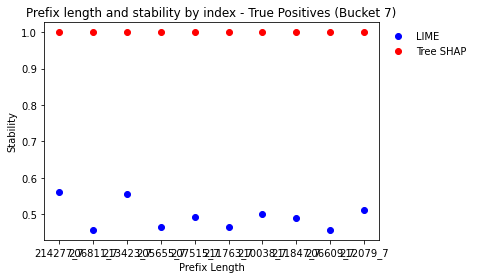

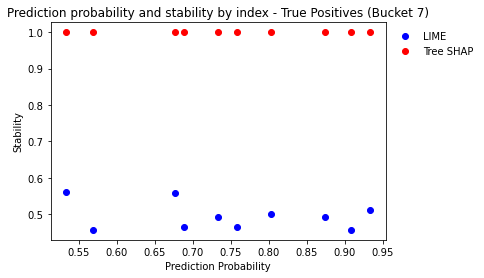

False Negatives
Average LIME Stability: 0.5013877551020407
Average SHAP Stability: 1.0


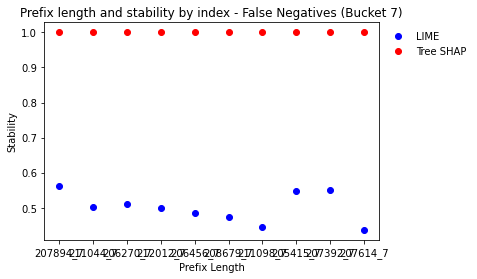

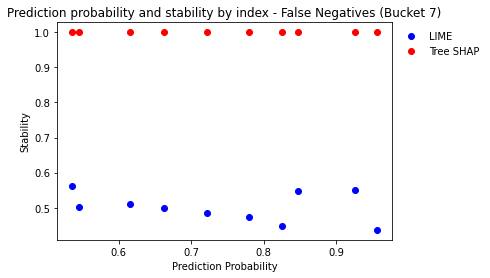

False Positives
Average LIME Stability: 0.4634285714285714
Average SHAP Stability: 1.0


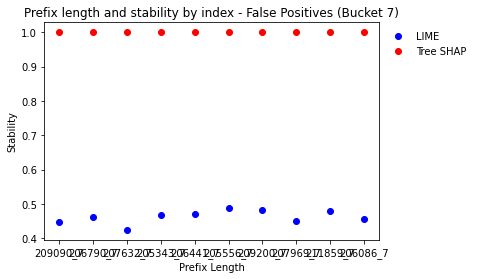

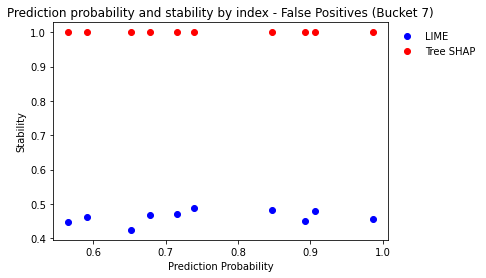

Bucket 8
True Negatives
Average LIME Stability: 0.48057142857142854
Average SHAP Stability: 1.0


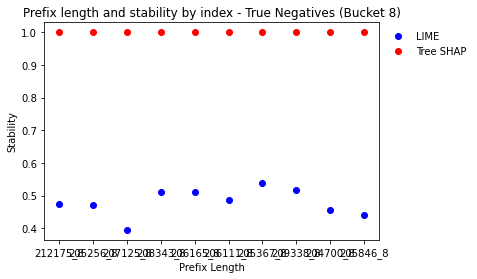

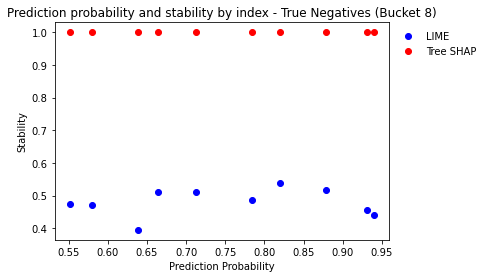

True Positives
Average LIME Stability: 0.4940408163265306
Average SHAP Stability: 1.0


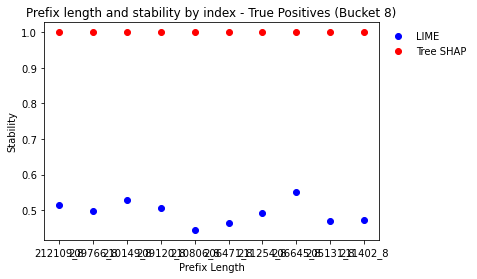

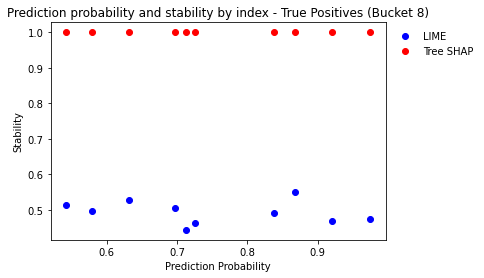

False Negatives
Average LIME Stability: 0.5131428571428571
Average SHAP Stability: 1.0


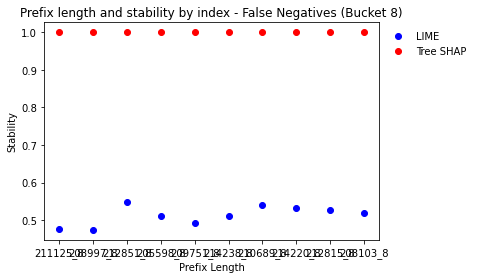

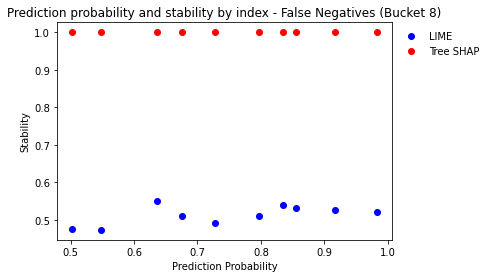

False Positives
Average LIME Stability: 0.4844897959183673
Average SHAP Stability: 1.0


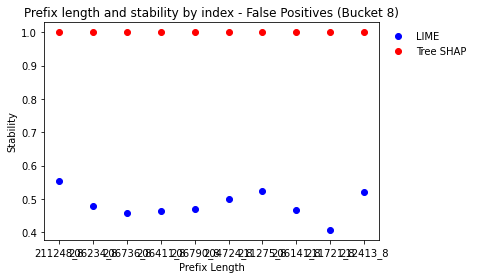

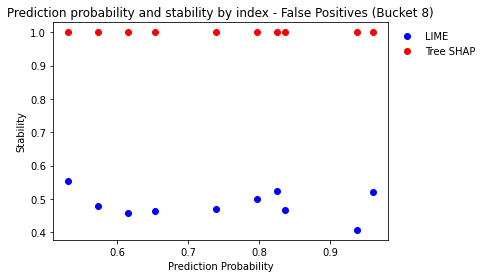

Bucket 9
True Negatives
Average LIME Stability: 0.4720044893378227
Average SHAP Stability: 1.0


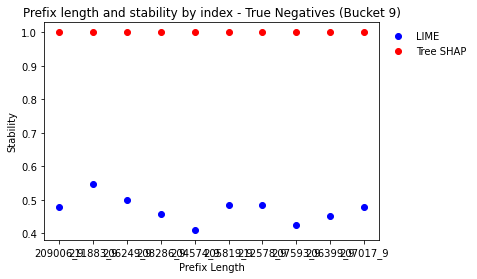

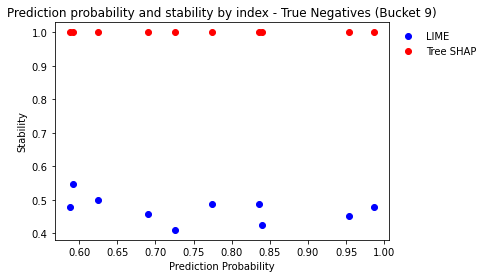

True Positives
Average LIME Stability: 0.47347250280583614
Average SHAP Stability: 1.0


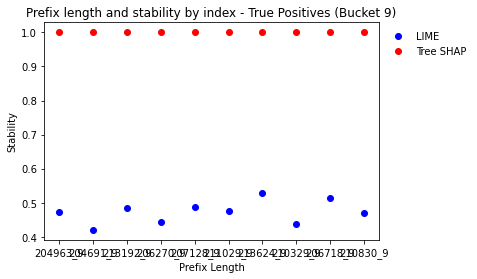

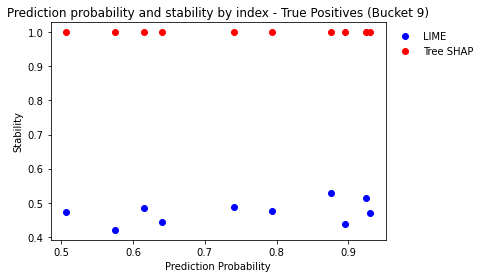

False Negatives
Average LIME Stability: 0.4859506172839506
Average SHAP Stability: 1.0


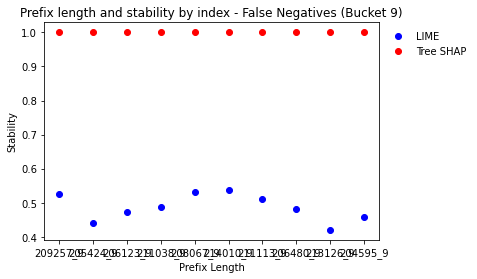

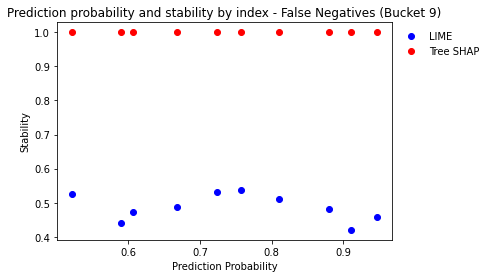

False Positives
Average LIME Stability: 0.4808125701459035
Average SHAP Stability: 1.0


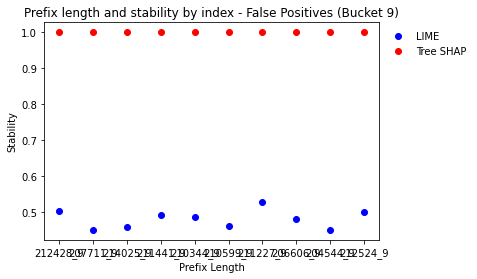

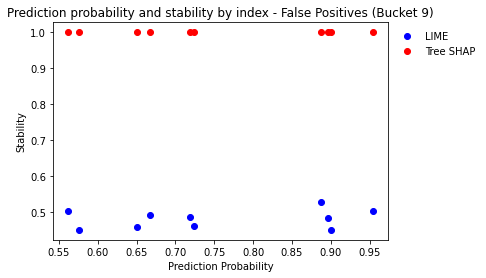

Bucket 10
True Negatives
Average LIME Stability: 0.4426666666666666
Average SHAP Stability: 1.0


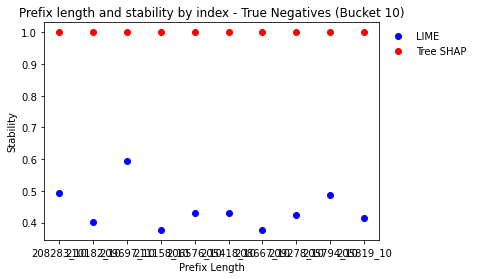

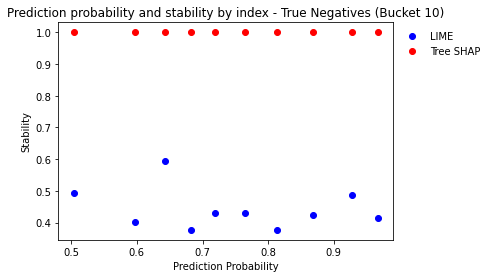

True Positives
Average LIME Stability: 0.47859999999999997
Average SHAP Stability: 1.0


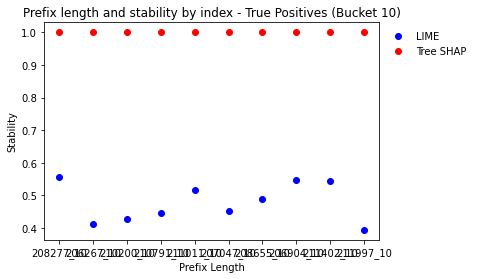

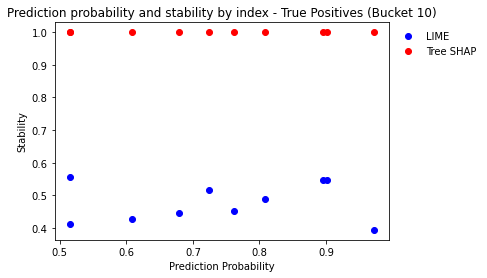

False Negatives
Average LIME Stability: 0.47102222222222223
Average SHAP Stability: 1.0


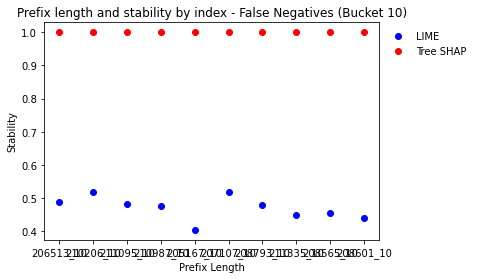

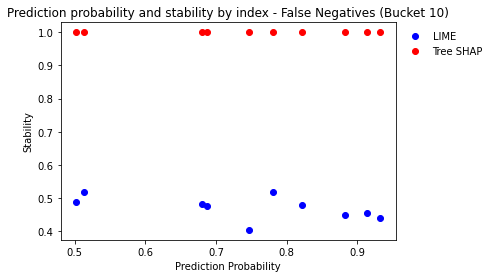

False Positives
Average LIME Stability: 0.4722444444444444
Average SHAP Stability: 1.0


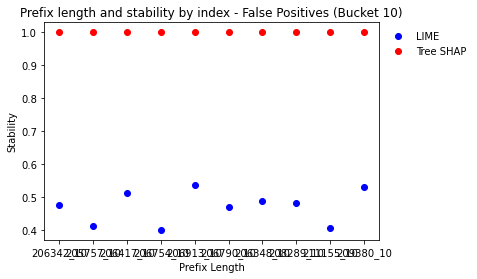

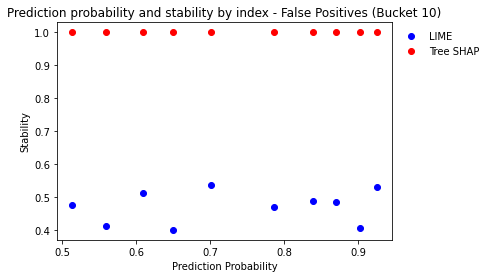

Bucket 11
True Negatives
Average LIME Stability: 0.4861518151815182
Average SHAP Stability: 1.0


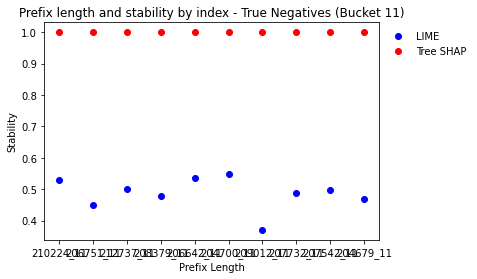

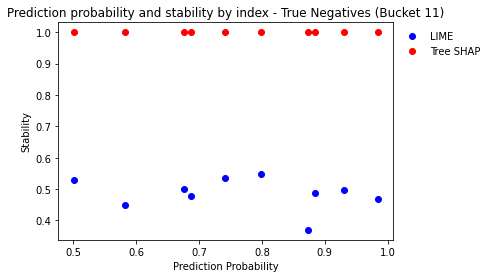

True Positives
Average LIME Stability: 0.4907920792079208
Average SHAP Stability: 1.0


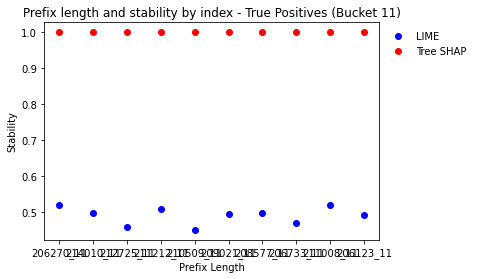

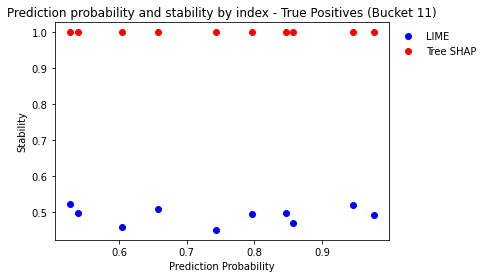

False Negatives
Average LIME Stability: 0.5071551155115511
Average SHAP Stability: 1.0


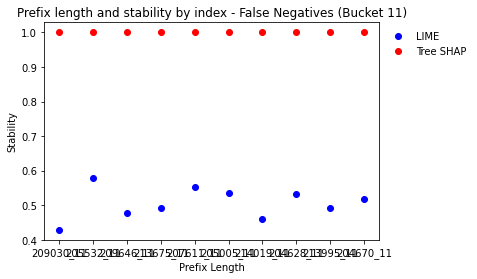

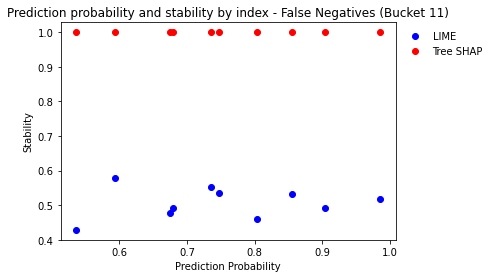

False Positives
Average LIME Stability: 0.5066666666666667
Average SHAP Stability: 1.0


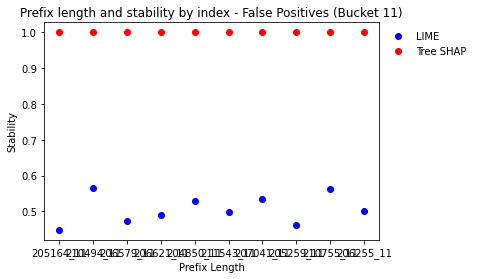

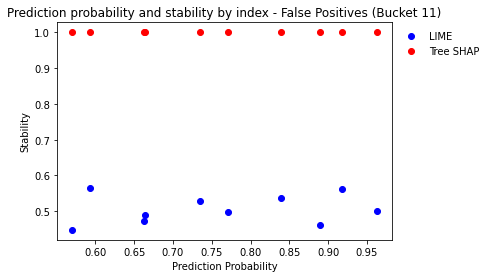

Bucket 12
True Negatives
Average LIME Stability: 0.48102310231023104
Average SHAP Stability: 1.0


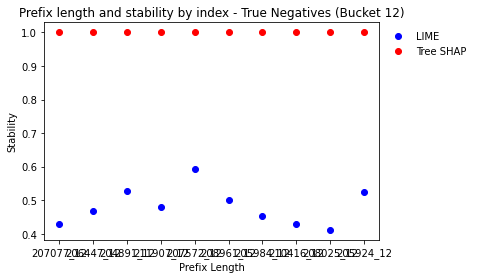

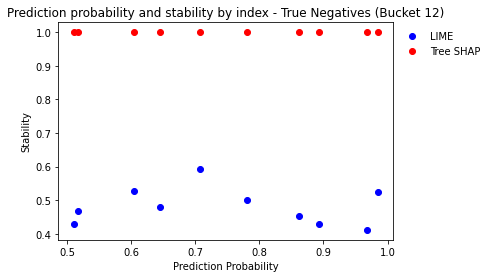

True Positives
Average LIME Stability: 0.5000726072607261
Average SHAP Stability: 1.0


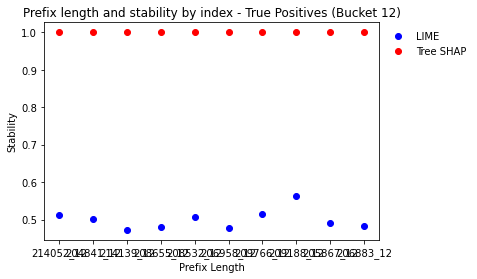

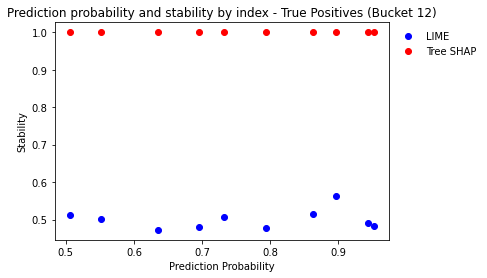

False Negatives
Average LIME Stability: 0.4729636963696369
Average SHAP Stability: 1.0


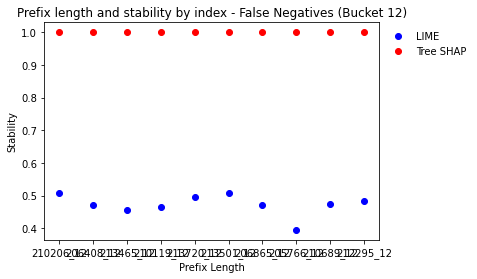

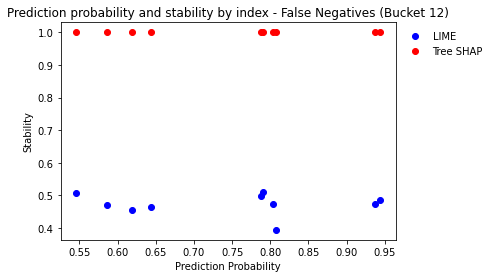

False Positives
Average LIME Stability: 0.46148514851485145
Average SHAP Stability: 1.0


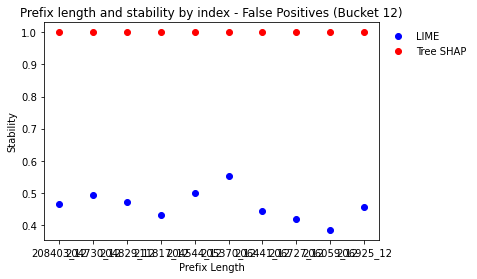

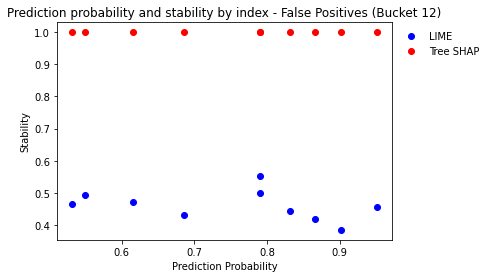

Bucket 13
True Negatives
Average LIME Stability: 0.475989417989418
Average SHAP Stability: 1.0


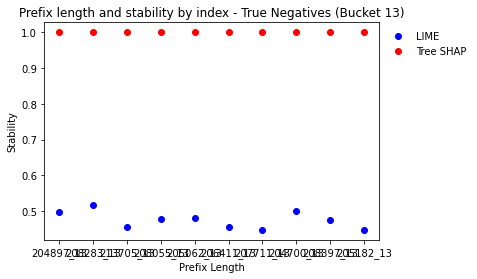

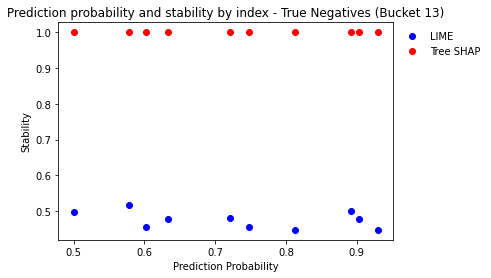

True Positives
Average LIME Stability: 0.4652804232804233
Average SHAP Stability: 1.0


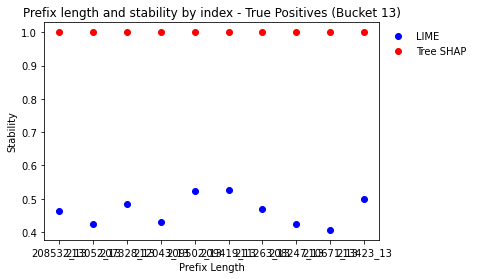

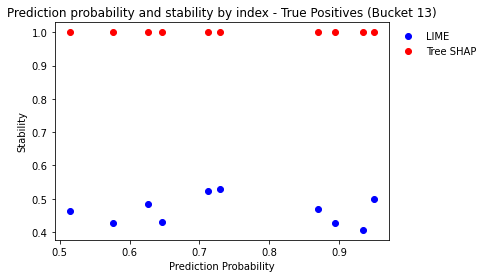

False Negatives
Average LIME Stability: 0.47477248677248685
Average SHAP Stability: 1.0


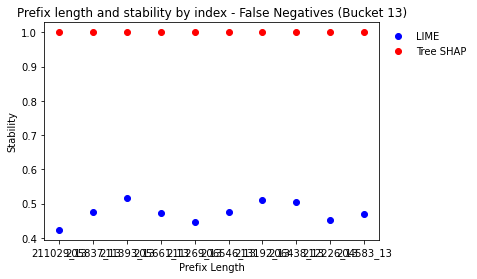

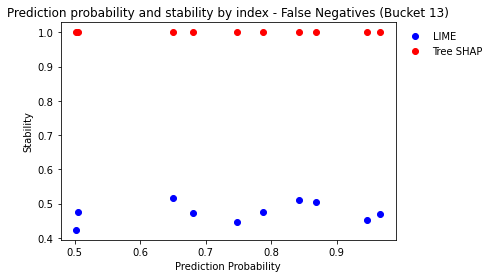

False Positives
Average LIME Stability: 0.48791534391534397
Average SHAP Stability: 1.0


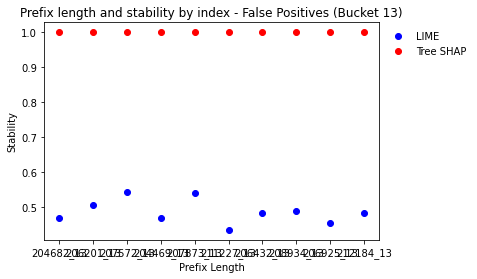

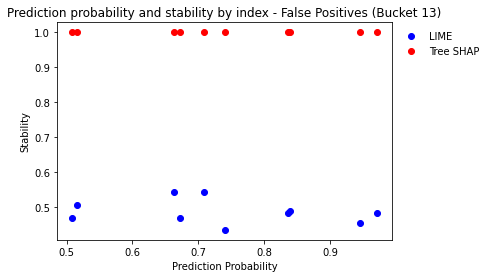

Bucket 14
True Negatives
Average LIME Stability: 0.5187878787878788
Average SHAP Stability: 1.0


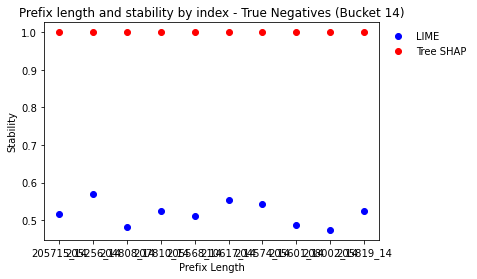

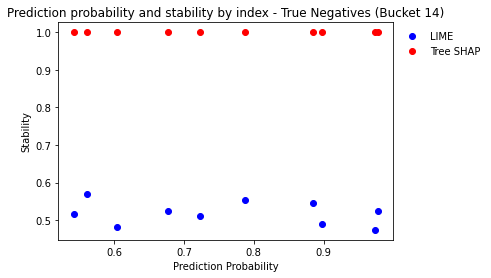

True Positives
Average LIME Stability: 0.5078787878787878
Average SHAP Stability: 1.0


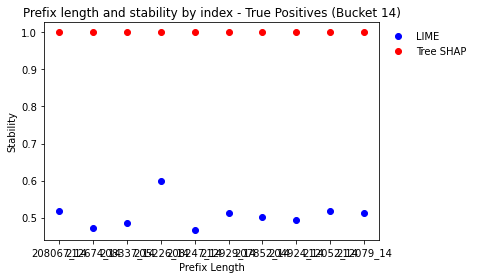

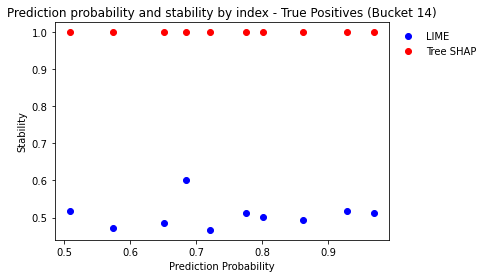

False Negatives
Average LIME Stability: 0.4991515151515151
Average SHAP Stability: 1.0


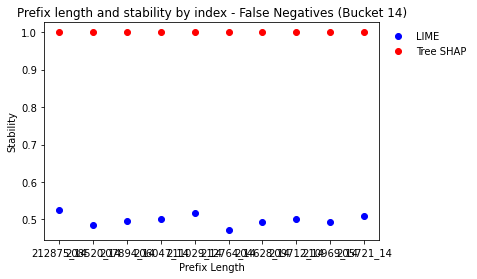

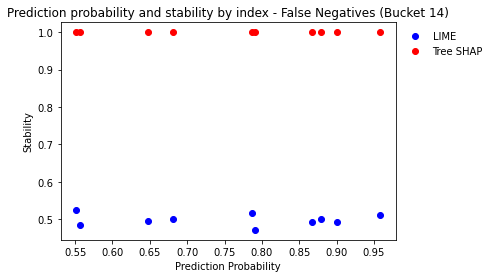

False Positives
Average LIME Stability: 0.5119999999999999
Average SHAP Stability: 1.0


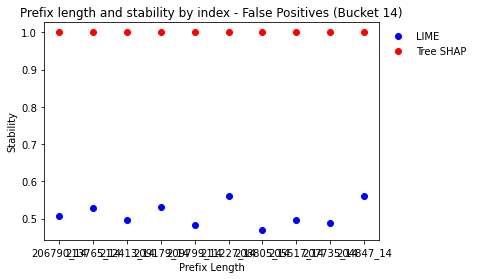

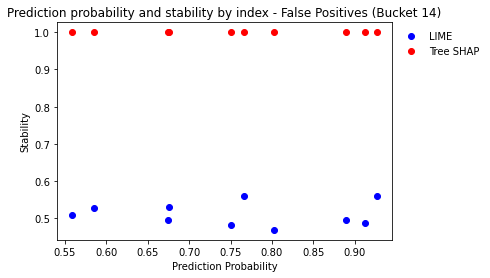

Bucket 15
True Negatives
Average LIME Stability: 0.5330595238095238
Average SHAP Stability: 1.0


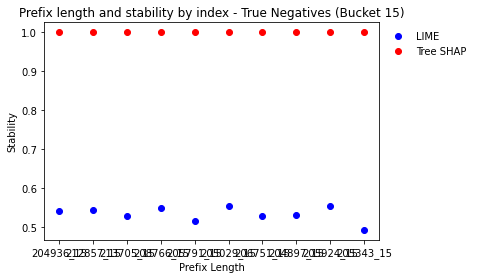

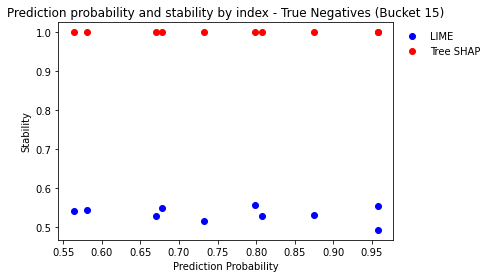

True Positives
Average LIME Stability: 0.5333015873015873
Average SHAP Stability: 1.0


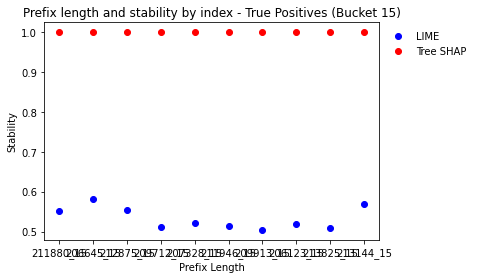

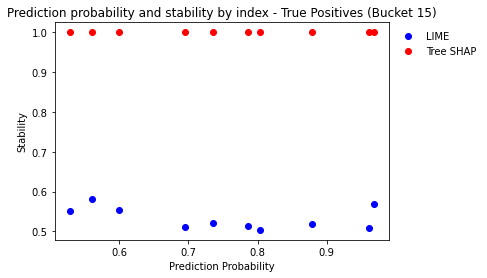

False Negatives
Average LIME Stability: 0.5524246031746032
Average SHAP Stability: 1.0


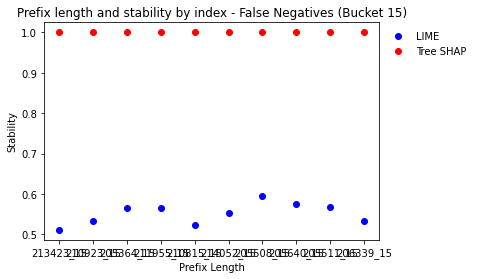

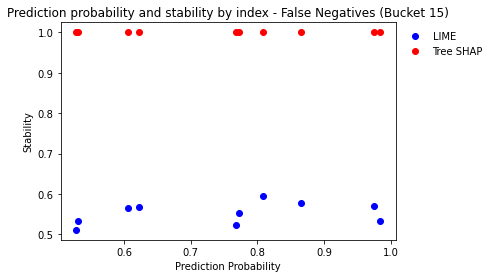

False Positives
Average LIME Stability: 0.5391111111111111
Average SHAP Stability: 1.0


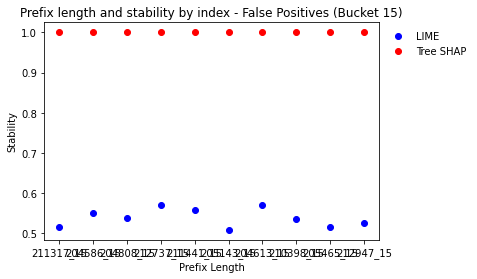

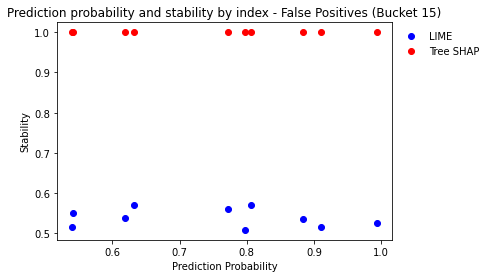

Bucket 16
True Negatives
Average LIME Stability: 0.6180238095238095
Average SHAP Stability: 1.0


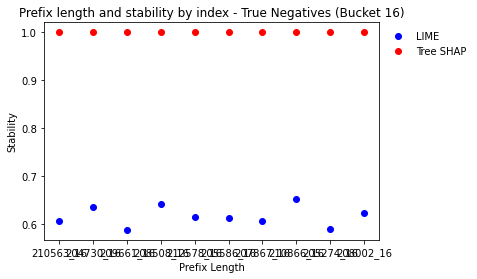

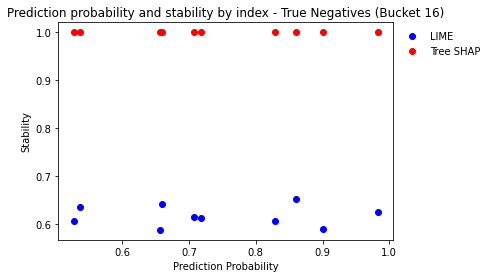

True Positives
Average LIME Stability: 0.5986587301587302
Average SHAP Stability: 1.0


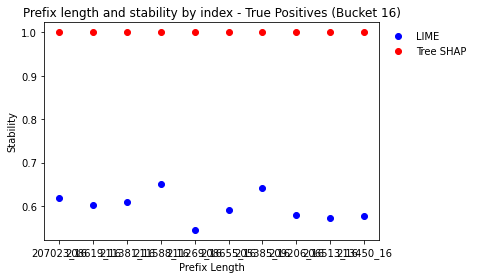

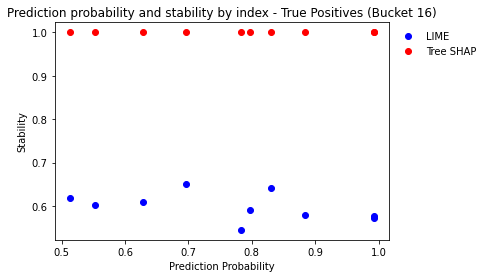

False Negatives
Average LIME Stability: 0.5906706349206349
Average SHAP Stability: 1.0


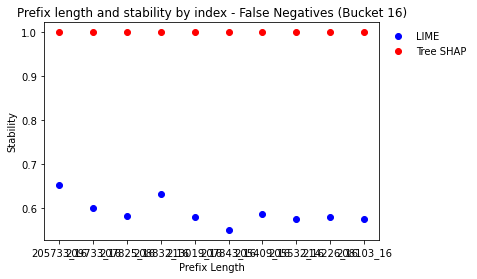

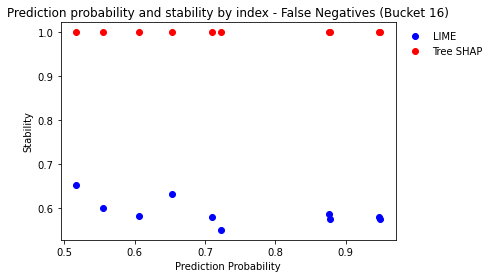

False Positives
Average LIME Stability: 0.6071309523809524
Average SHAP Stability: 1.0


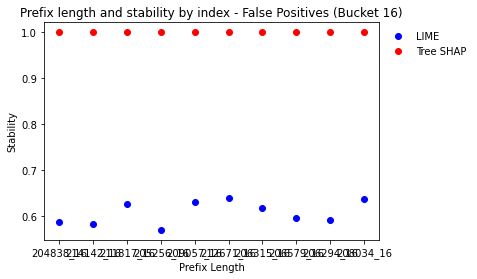

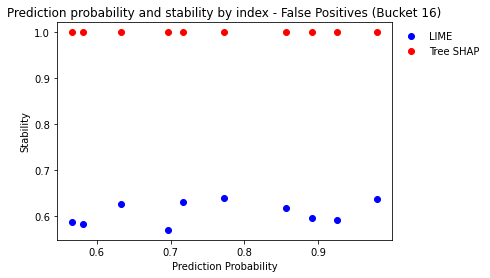

Bucket 17
True Negatives
Average LIME Stability: 0.6548304093567251
Average SHAP Stability: 1.0


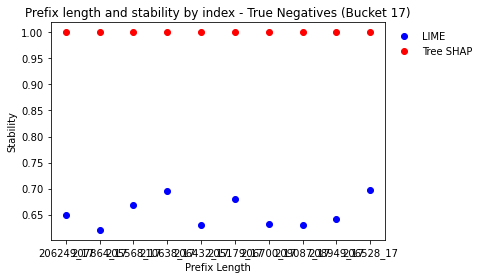

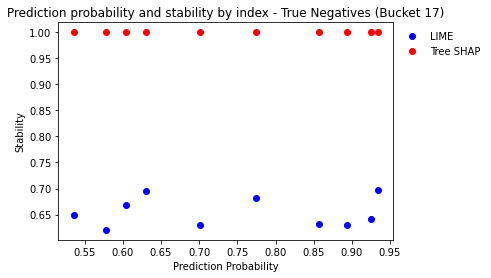

True Positives
Average LIME Stability: 0.6466120857699804
Average SHAP Stability: 1.0


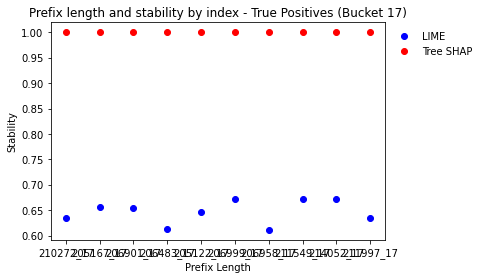

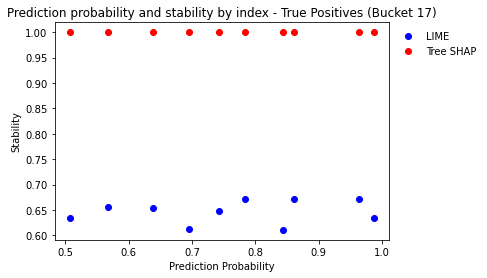

False Negatives
Average LIME Stability: 0.6642573099415204
Average SHAP Stability: 1.0


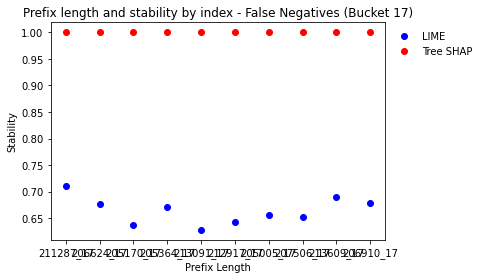

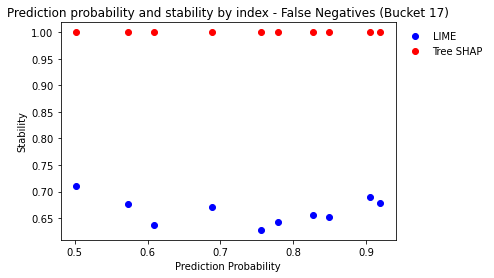

False Positives
Average LIME Stability: 0.6499961013645223
Average SHAP Stability: 1.0


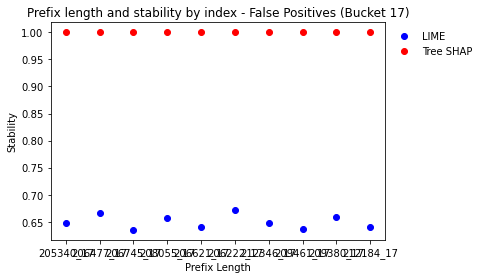

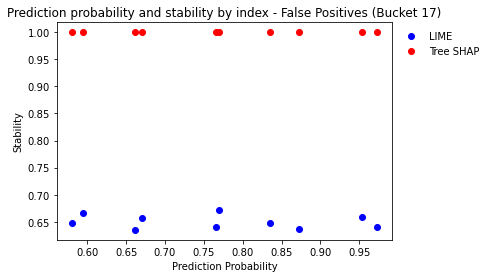

Bucket 18
True Negatives
Average LIME Stability: 0.6376851851851851
Average SHAP Stability: 1.0


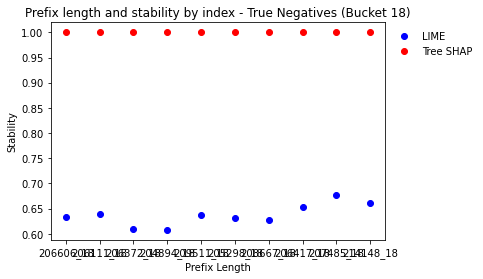

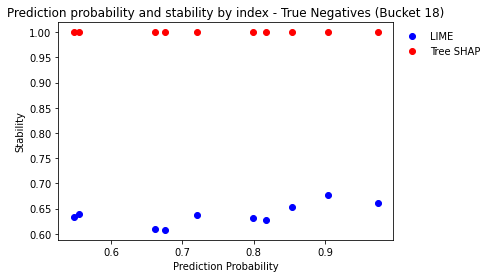

True Positives
Average LIME Stability: 0.6689814814814815
Average SHAP Stability: 1.0


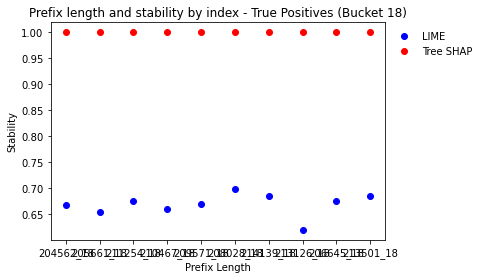

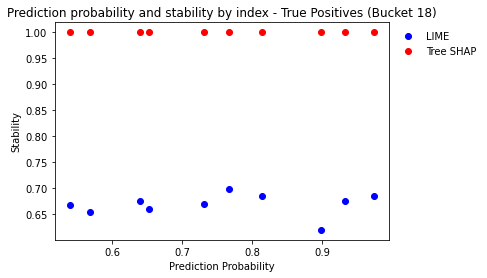

False Negatives
Average LIME Stability: 0.6384074074074074
Average SHAP Stability: 1.0


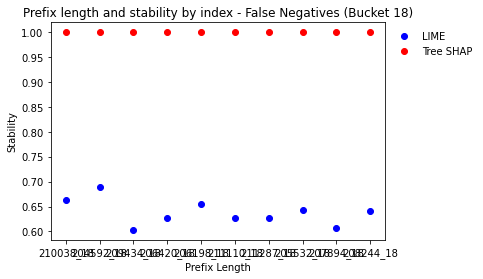

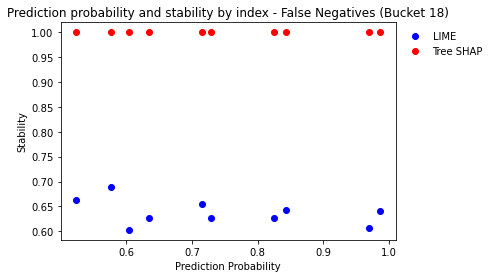

False Positives
Average LIME Stability: 0.6425
Average SHAP Stability: 1.0


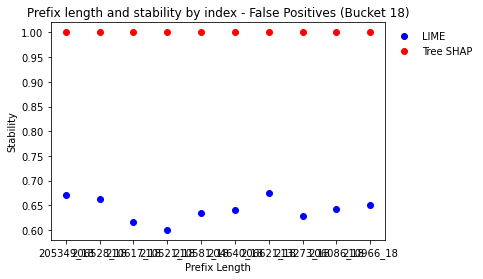

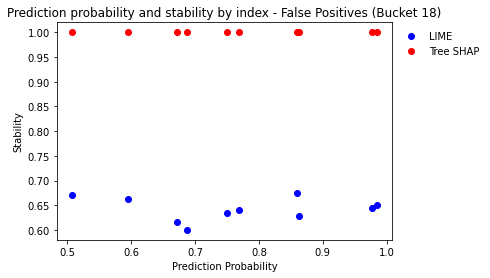

Bucket 19
True Negatives
Average LIME Stability: 0.6631772268135904
Average SHAP Stability: 1.0


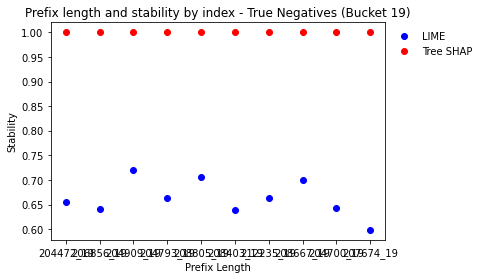

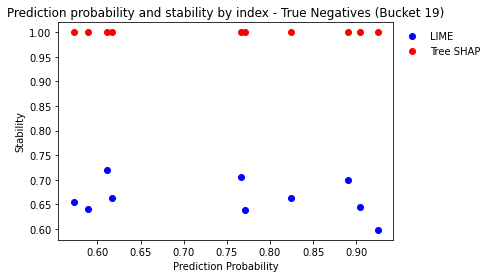

True Positives
Average LIME Stability: 0.6355096418732782
Average SHAP Stability: 1.0


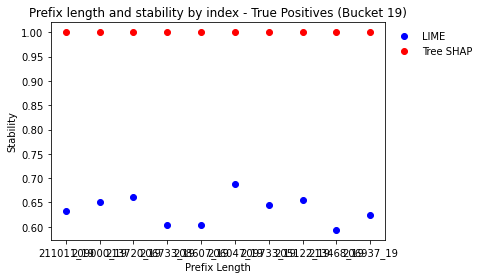

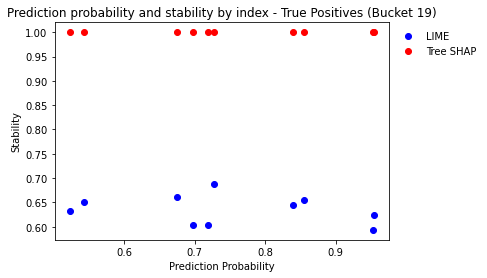

False Negatives
Average LIME Stability: 0.6509072543617997
Average SHAP Stability: 1.0


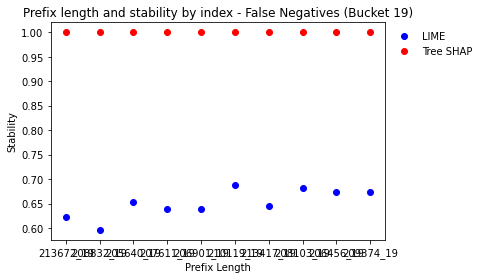

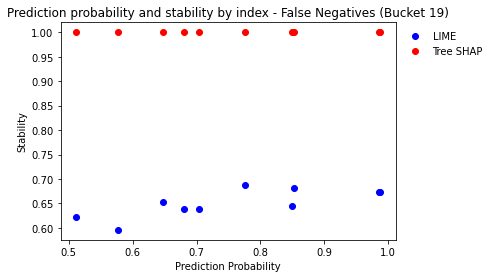

False Positives
Average LIME Stability: 0.6687107438016529
Average SHAP Stability: 1.0


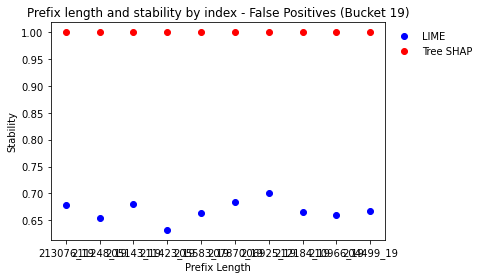

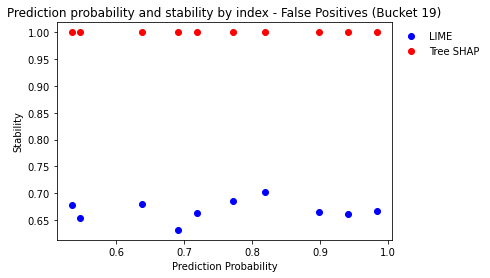

Bucket 20
True Negatives
Average LIME Stability: 0.6580686540198736
Average SHAP Stability: 1.0


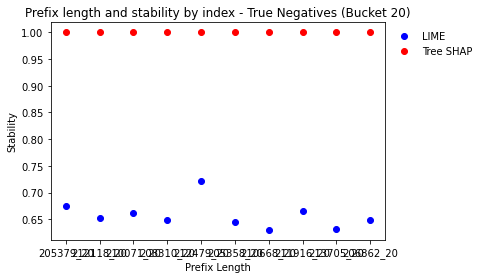

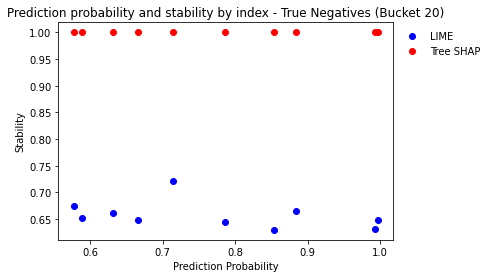

True Positives
Average LIME Stability: 0.6325980126467932
Average SHAP Stability: 1.0


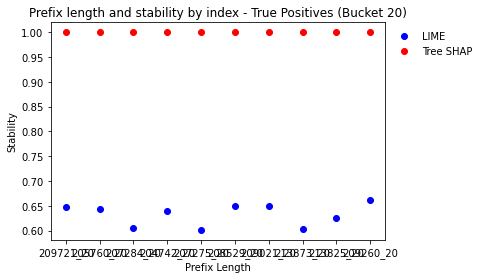

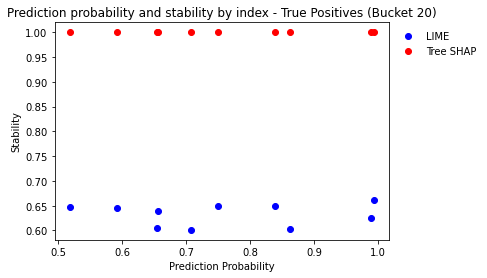

False Negatives
Average LIME Stability: 0.6604715447154471
Average SHAP Stability: 1.0


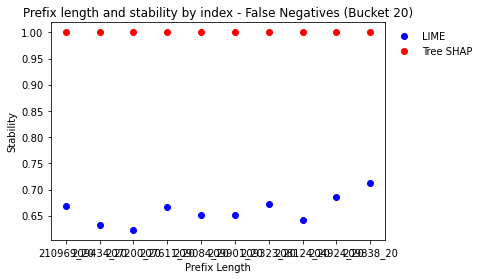

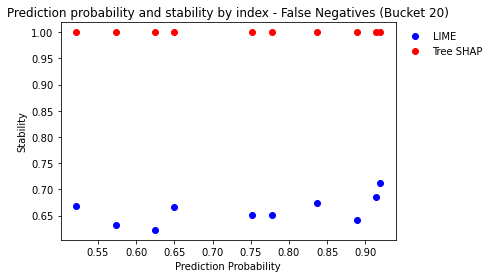

False Positives
Average LIME Stability: 0.6566269196025294
Average SHAP Stability: 1.0


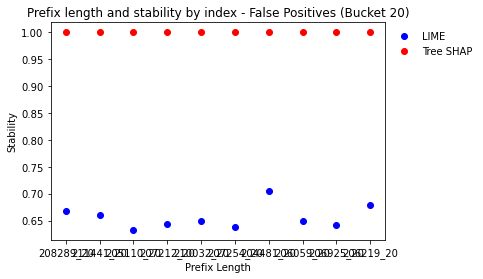

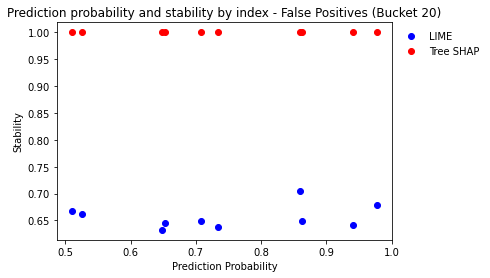

Bucket 21
True Negatives
Average LIME Stability: 0.6594767025089605
Average SHAP Stability: 1.0


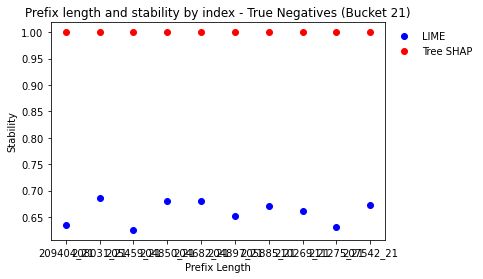

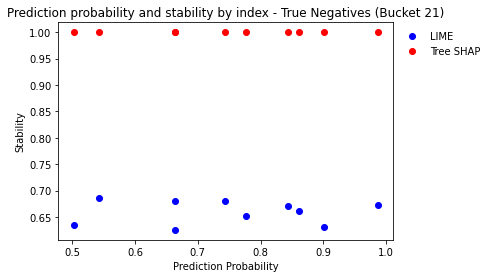

True Positives
Average LIME Stability: 0.6325806451612903
Average SHAP Stability: 1.0


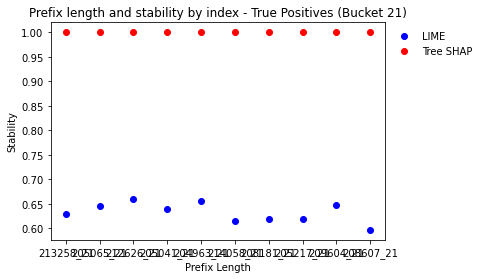

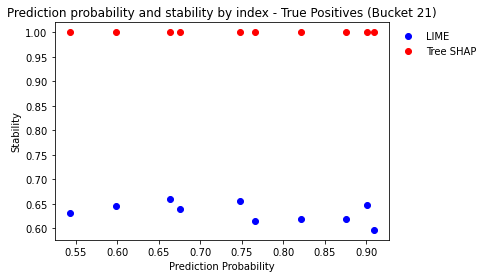

False Negatives
Average LIME Stability: 0.6388243727598566
Average SHAP Stability: 1.0


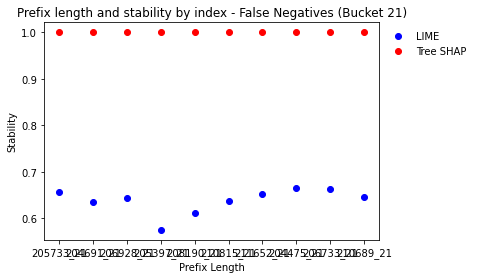

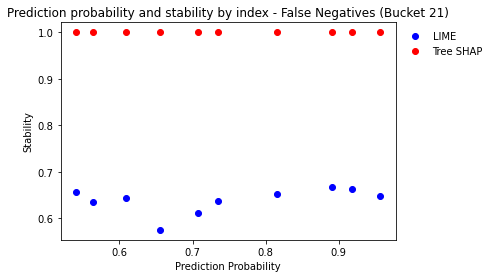

False Positives
Average LIME Stability: 0.6551541218637993
Average SHAP Stability: 1.0


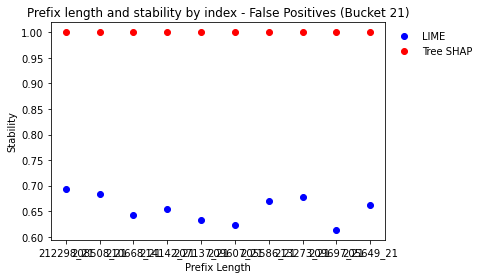

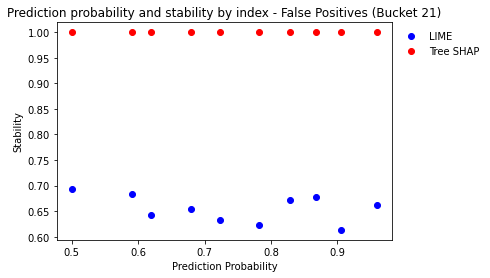

Bucket 22
True Negatives
Average LIME Stability: 0.7046236559139785
Average SHAP Stability: 1.0


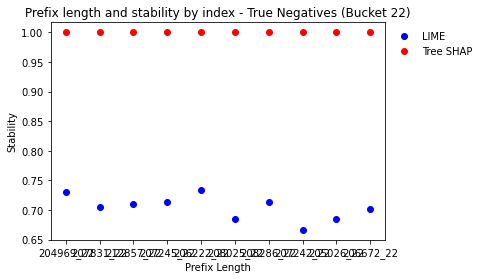

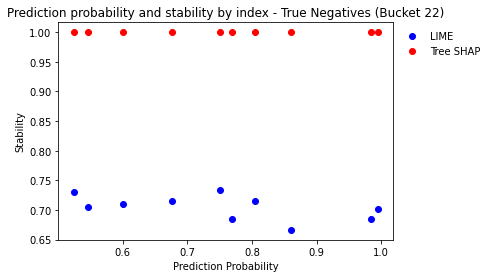

True Positives
Average LIME Stability: 0.7101469534050179
Average SHAP Stability: 1.0


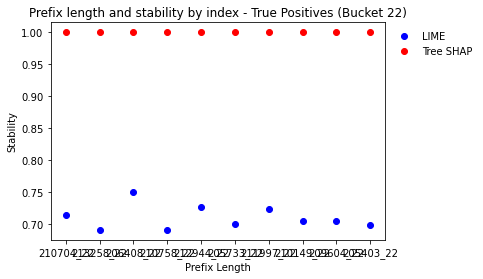

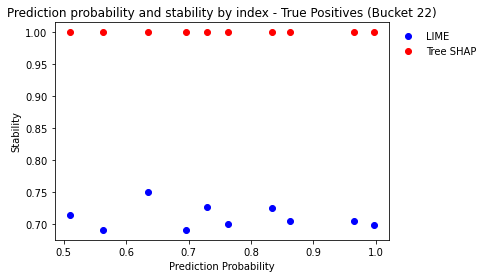

False Negatives
Average LIME Stability: 0.7180716845878136
Average SHAP Stability: 1.0


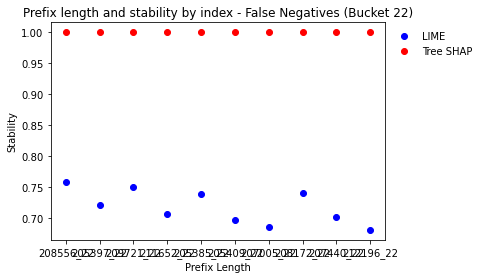

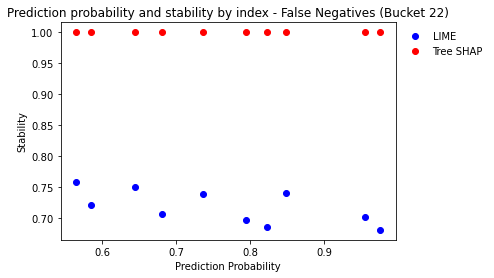

False Positives
Average LIME Stability: 0.7043835125448028
Average SHAP Stability: 1.0


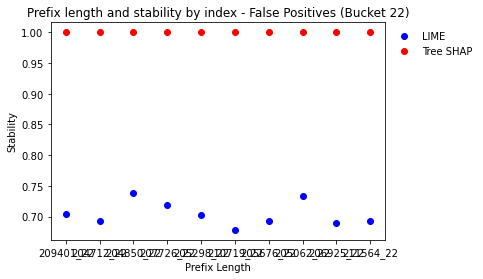

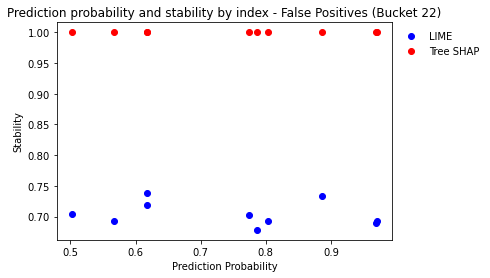

Bucket 23
True Negatives
Average LIME Stability: 0.7053440860215053
Average SHAP Stability: 1.0


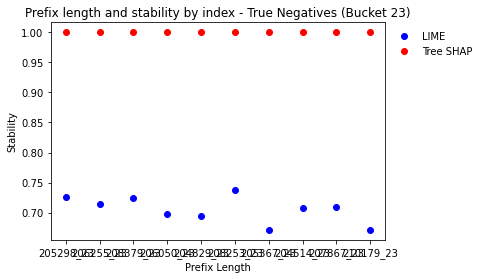

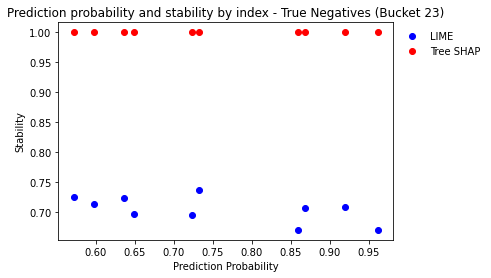

True Positives
Average LIME Stability: 0.6813297491039426
Average SHAP Stability: 1.0


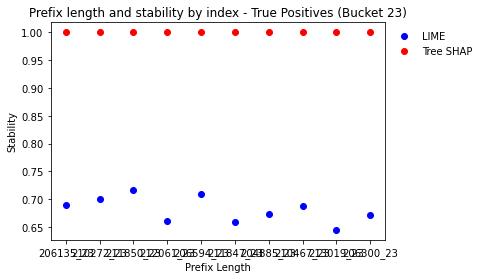

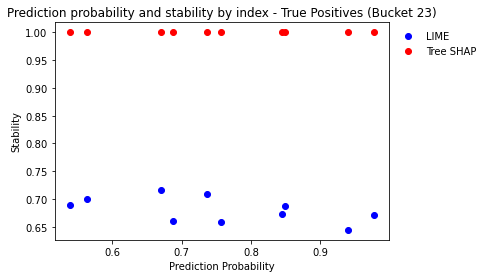

False Negatives
Average LIME Stability: 0.6954982078853047
Average SHAP Stability: 1.0


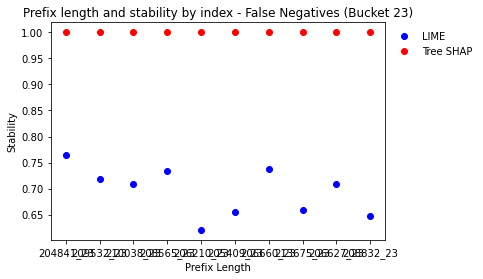

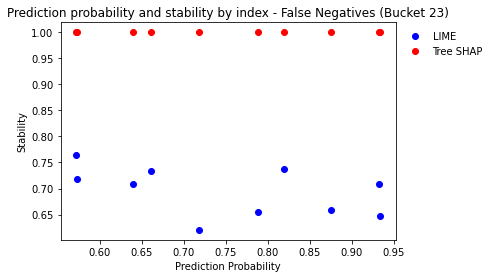

False Positives
Average LIME Stability: 0.7010215053763441
Average SHAP Stability: 1.0


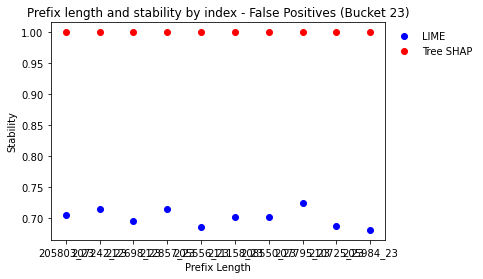

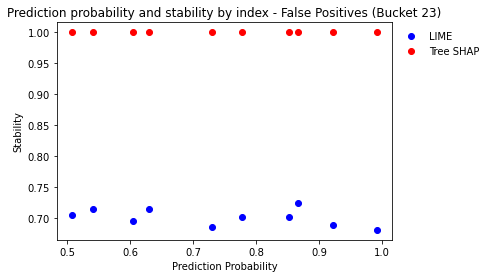

Bucket 24
True Negatives
Average LIME Stability: 0.713268817204301
Average SHAP Stability: 1.0


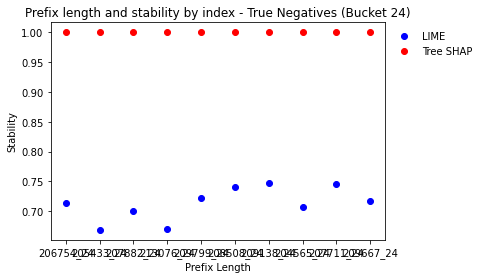

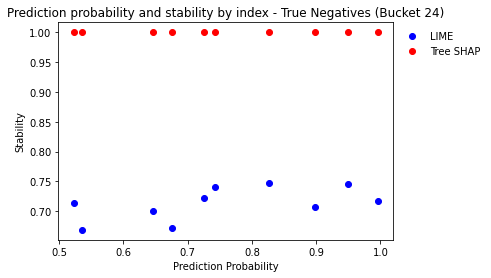

True Positives
Average LIME Stability: 0.7233548387096773
Average SHAP Stability: 1.0


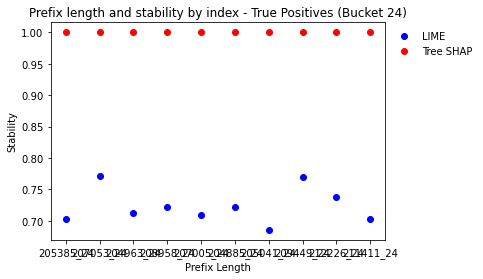

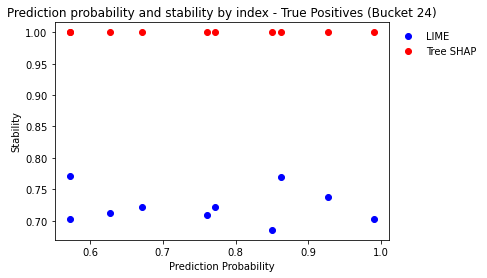

False Negatives
Average LIME Stability: 0.7228745519713261
Average SHAP Stability: 1.0


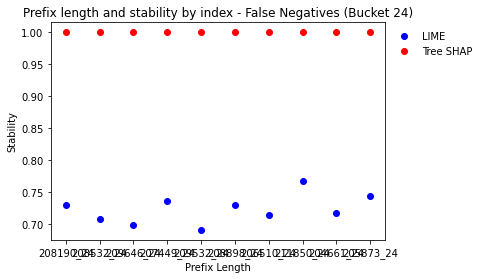

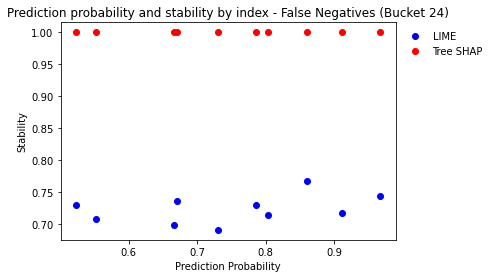

False Positives
Average LIME Stability: 0.7279175627240143
Average SHAP Stability: 1.0


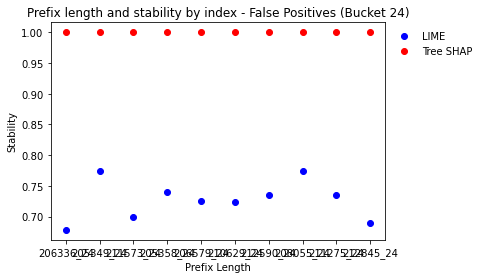

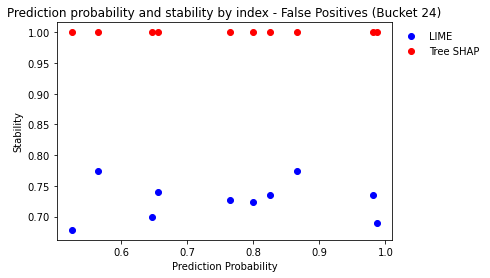

Bucket 25
True Negatives
Average LIME Stability: 0.6606774193548387
Average SHAP Stability: 1.0


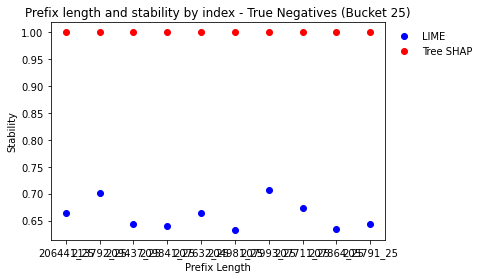

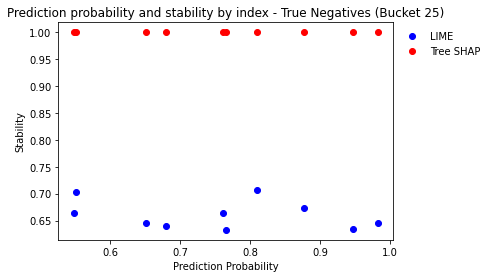

True Positives
Average LIME Stability: 0.632820788530466
Average SHAP Stability: 1.0


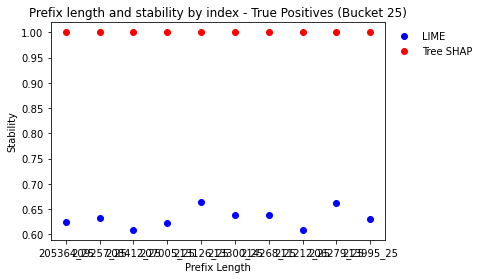

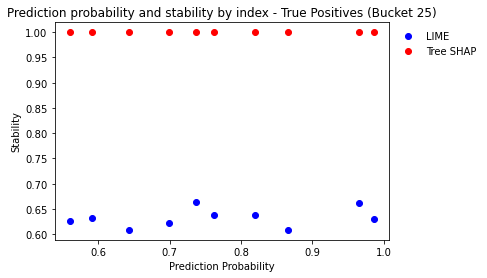

False Negatives
Average LIME Stability: 0.6397849462365591
Average SHAP Stability: 1.0


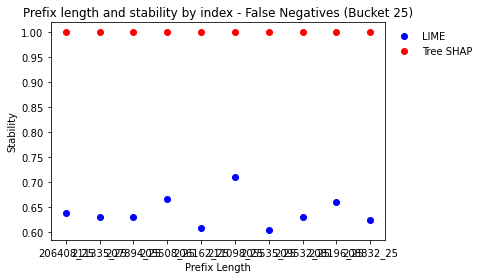

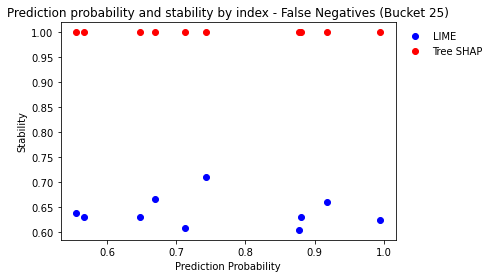

False Positives
Average LIME Stability: 0.6433870967741935
Average SHAP Stability: 1.0


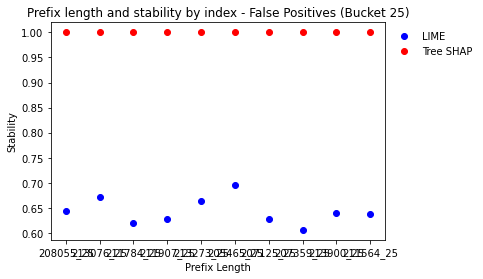

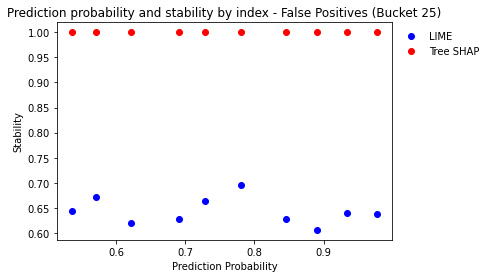

Bucket 26
True Negatives
Average LIME Stability: 0.7543333333333333
Average SHAP Stability: 1.0


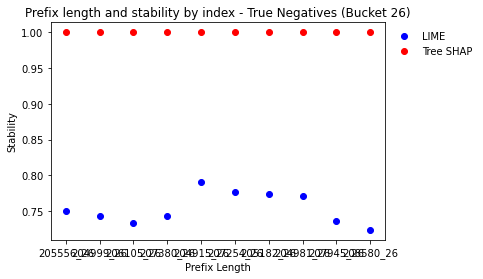

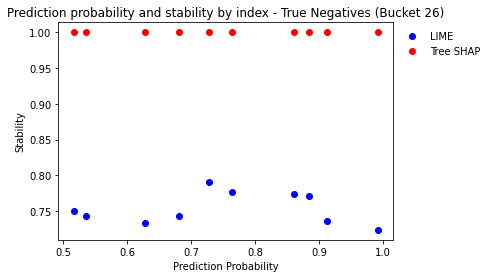

True Positives
Average LIME Stability: 0.7593763440860215
Average SHAP Stability: 1.0


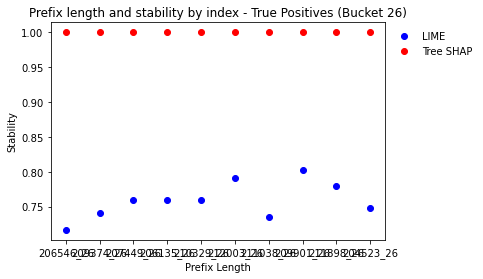

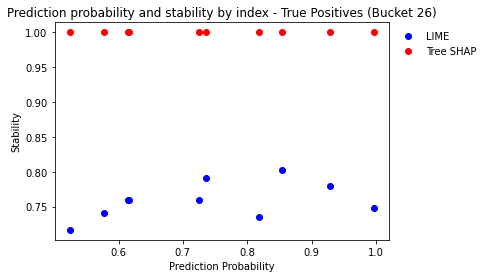

False Negatives
Average LIME Stability: 0.7466487455197133
Average SHAP Stability: 1.0


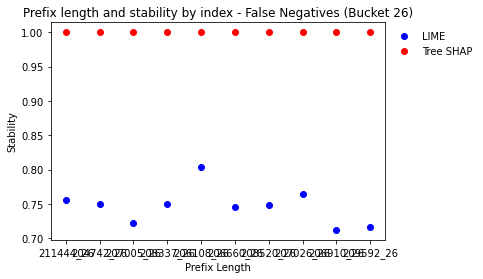

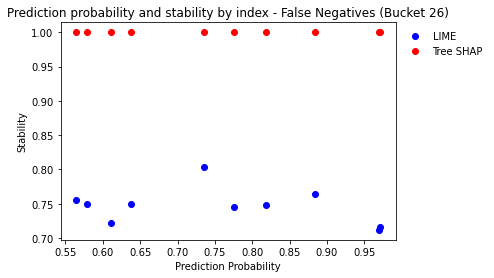

False Positives
Average LIME Stability: 0.7420860215053763
Average SHAP Stability: 1.0


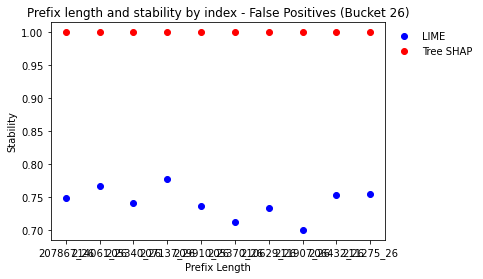

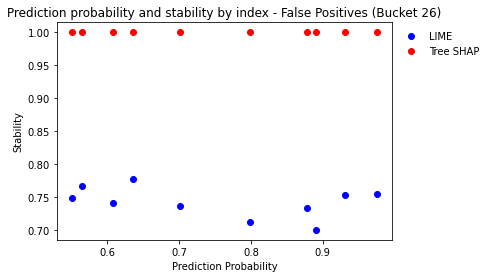

Bucket 27
True Negatives
Average LIME Stability: 0.7108673835125447
Average SHAP Stability: 1.0


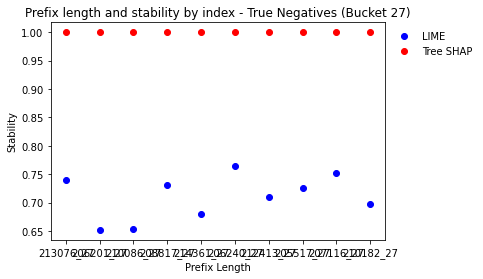

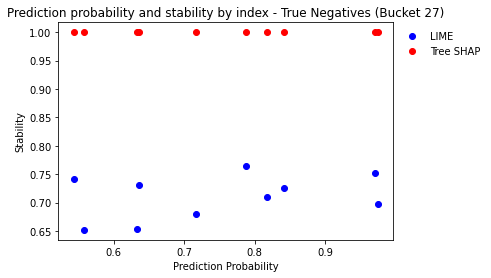

True Positives
Average LIME Stability: 0.7226344086021504
Average SHAP Stability: 1.0


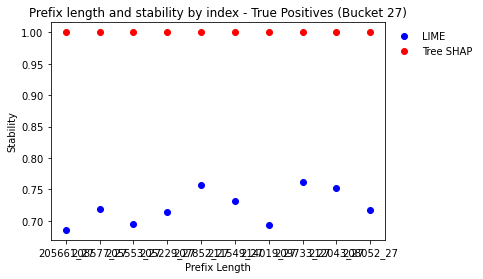

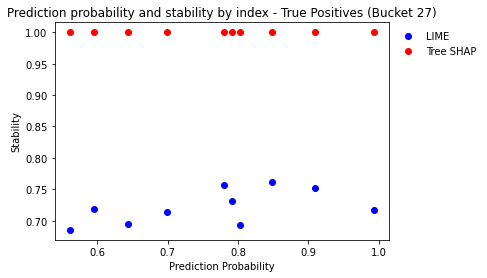

False Negatives
Average LIME Stability: 0.6957383512544802
Average SHAP Stability: 1.0


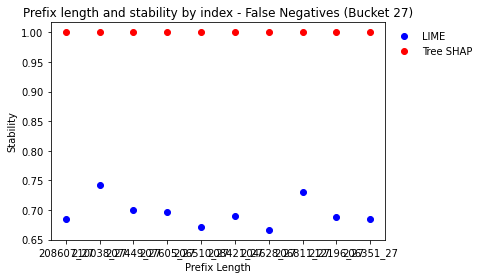

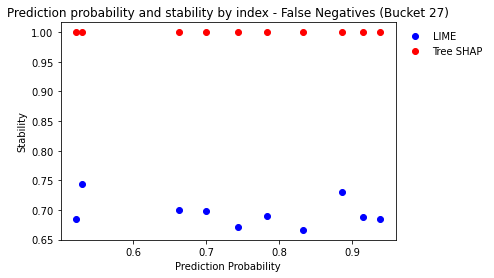

False Positives
Average LIME Stability: 0.6928566308243728
Average SHAP Stability: 1.0


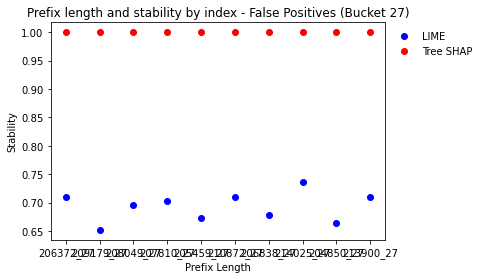

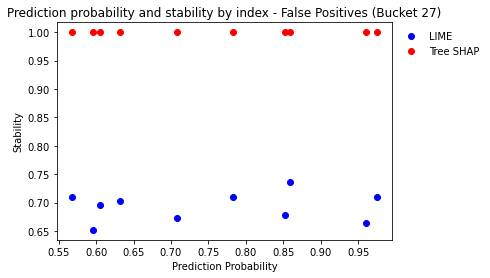

Bucket 28
True Negatives
Average LIME Stability: 0.784831541218638
Average SHAP Stability: 1.0


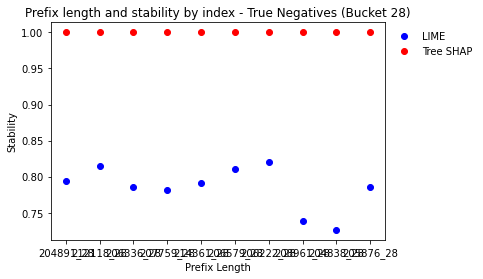

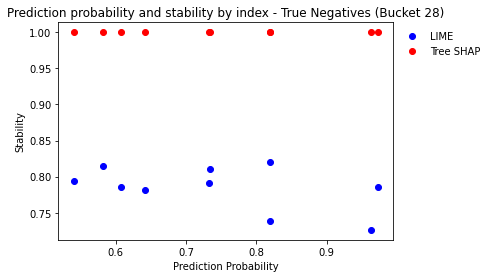

True Positives
Average LIME Stability: 0.7860322580645162
Average SHAP Stability: 1.0


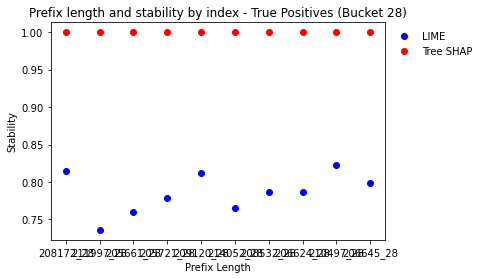

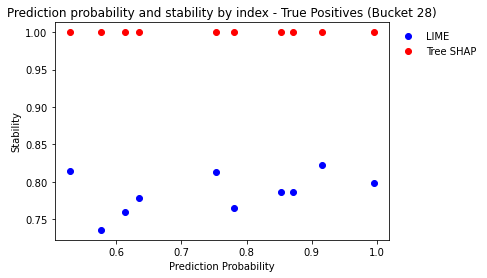

False Negatives
Average LIME Stability: 0.7879534050179211
Average SHAP Stability: 1.0


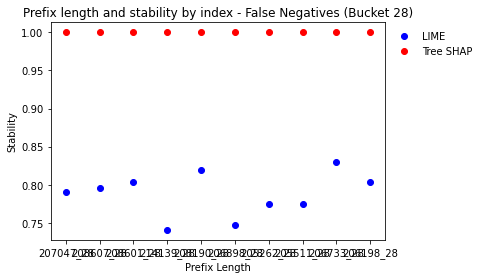

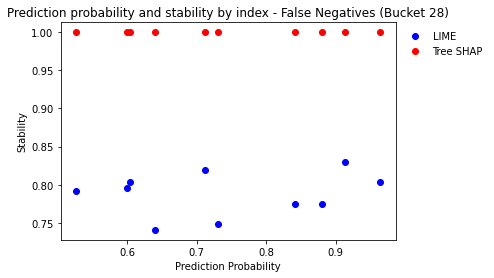

False Positives
Average LIME Stability: 0.7862724014336917
Average SHAP Stability: 1.0


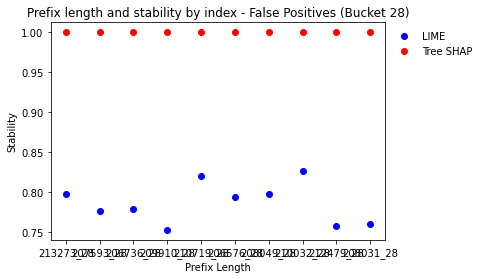

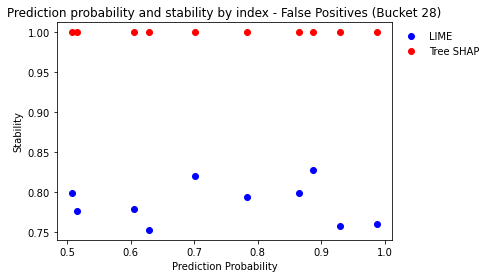

Bucket 29
True Negatives
Average LIME Stability: 0.7336810035842294
Average SHAP Stability: 1.0


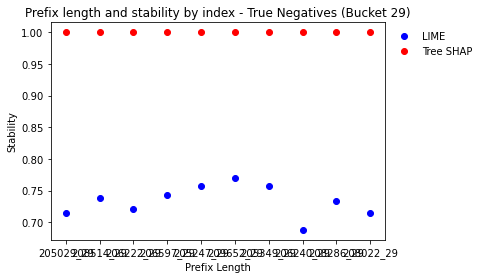

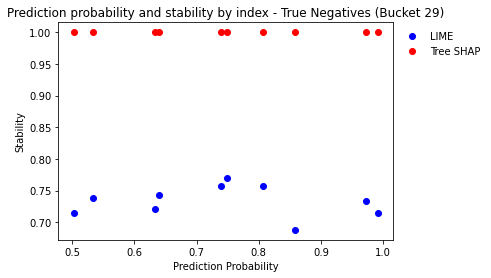

True Positives
Average LIME Stability: 0.7041433691756273
Average SHAP Stability: 1.0


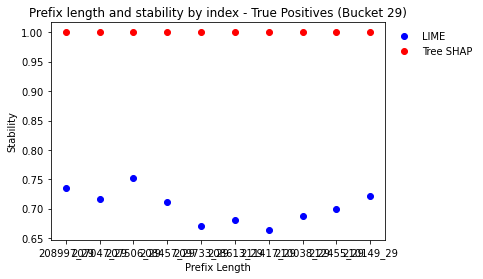

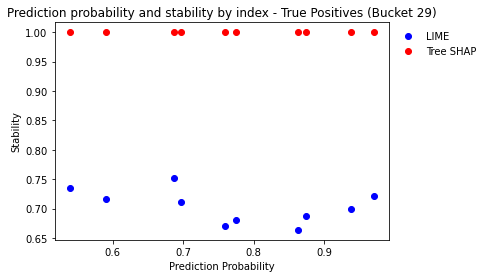

False Negatives
Average LIME Stability: 0.7048637992831541
Average SHAP Stability: 1.0


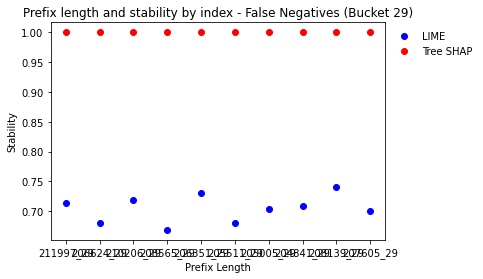

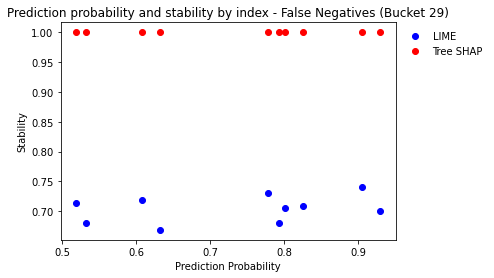

False Positives
Average LIME Stability: 0.719752688172043
Average SHAP Stability: 1.0


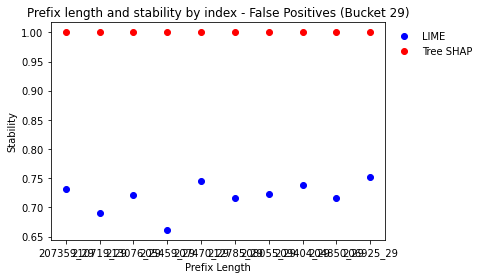

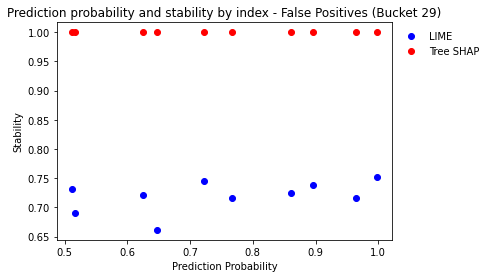

Bucket 30
True Negatives
Average LIME Stability: 0.7125483870967741
Average SHAP Stability: 1.0


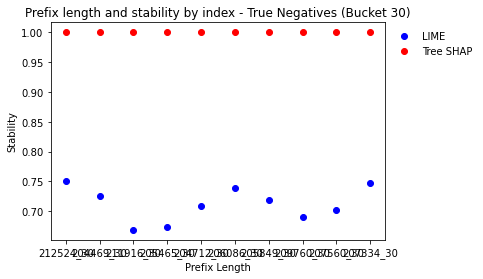

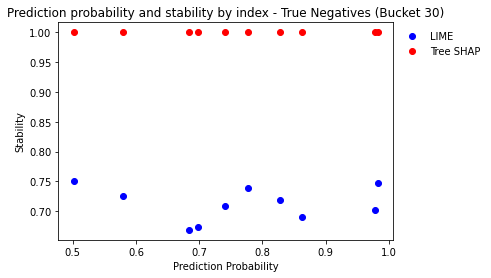

True Positives
Average LIME Stability: 0.7077455197132616
Average SHAP Stability: 1.0


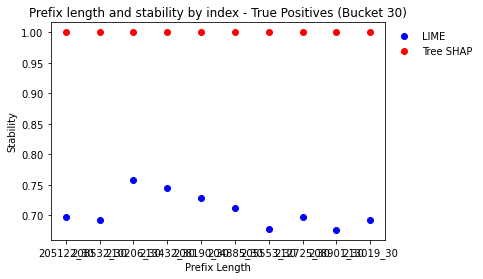

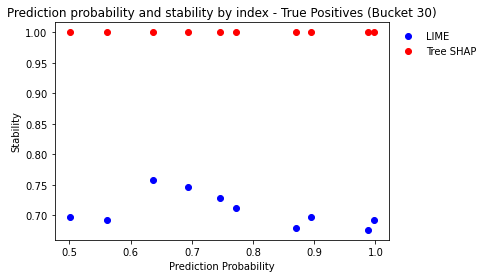

False Negatives
Average LIME Stability: 0.7303189964157706
Average SHAP Stability: 1.0


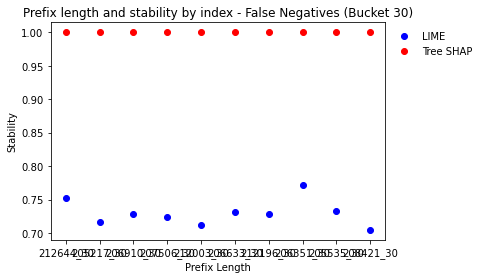

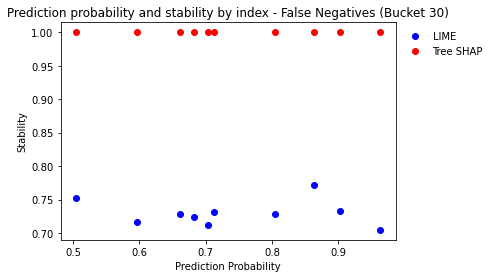

False Positives
Average LIME Stability: 0.7199928315412186
Average SHAP Stability: 1.0


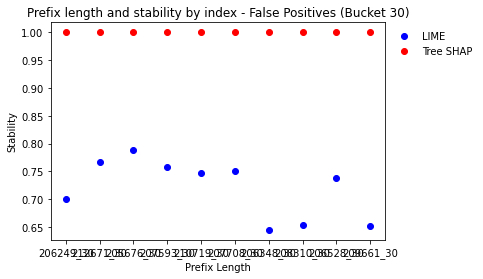

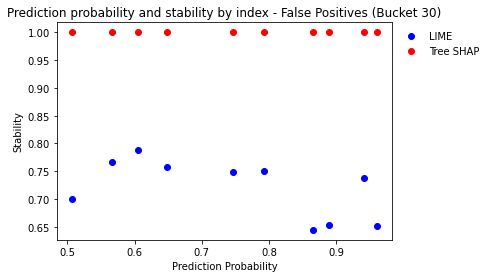

Bucket 31
True Negatives


KeyError: 'lime_stability'

In [5]:
case_ids = [[],[],[],[]]
lengths = [[],[],[],[]]
probas = [[],[],[],[]]
lime_stabs = [[],[],[],[]]
shap_stabs = [[],[],[],[]]

for dataset_name in datasets:

    dataset_manager = DatasetManager(dataset_name)

    for ii in range(n_iter):
        num_buckets = range(len([name for name in os.listdir(os.path.join(PATH,'%s/%s_%s/models'% (dataset_ref, cls_method, method_name)))]))

        for bucket in list(num_buckets):
            bucketID = bucket+1
            print ('Bucket', bucketID)

            #import everything needed to sort and predict
            feat_comb_path = os.path.join(PATH, "%s/%s_%s/bucketers_and_encoders/feature_combiner_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls_path = os.path.join(PATH, "%s/%s_%s/models/cls_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls = joblib.load(cls_path)
            feature_combiner = joblib.load(feat_comb_path)

            #import previously identified samples
            tn_path = os.path.join(PATH, "%s/%s_%s/samples/true_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            tp_path = os.path.join(PATH, "%s/%s_%s/samples/true_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fn_path = os.path.join(PATH, "%s/%s_%s/samples/false_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fp_path = os.path.join(PATH, "%s/%s_%s/samples/false_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))

            sample_instances = []

            with open (tn_path, 'rb') as f:
                tn_list = pickle.load(f)
            with open (tp_path, 'rb') as f:
                tp_list = pickle.load(f)
            with open (fn_path, 'rb') as f:
                fn_list = pickle.load(f)
            with open (fp_path, 'rb') as f:
                fp_list = pickle.load(f)

            #save results to a list
            sample_instances.append(tn_list)
            sample_instances.append(tp_list)
            sample_instances.append(fn_list)
            sample_instances.append(fp_list)
            
            type_list = ["True Negatives", "True Positives", "False Negatives", "False Positives"]
            
            for i in range(len(sample_instances)):
                print (type_list[i])
                data = pd.DataFrame.from_records(sample_instances[i])
                
                caseID = pd.Series(data['caseID']).tolist()
                nr_events = pd.Series(data['nr_events']).tolist()
                proba = pd.Series(data['proba']).tolist()
                lime_stability = pd.Series(data['lime_stability']).tolist()
                tree_shap_stability = pd.Series(data['tree_shap_stability']).tolist()
                
                case_ids[i].extend(caseID)
                lengths[i].extend(nr_events)
                probas[i].extend(proba)
                lime_stabs[i].extend(lime_stability)
                shap_stabs[i].extend(tree_shap_stability)
                
                print("Average LIME Stability:", statistics.mean(lime_stability))
                print("Average SHAP Stability:", statistics.mean(tree_shap_stability))
                
                fig, ax = plt.subplots()
                ax.plot(caseID, lime_stability, 'bo', label = "LIME")
                ax.plot(caseID, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax.set_xlabel("Prefix Length")
                ax.set_ylabel("Stability")
                ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.title("Prefix length and stability by index - "+type_list[i]+" (Bucket "+str(bucketID)+")")
                plt.show()
                
                fig2, ax2 = plt.subplots()
                ax2.plot(proba, lime_stability, 'bo', label = "LIME")
                ax2.plot(proba, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax2.set_xlabel("Prediction Probability")
                ax2.set_ylabel("Stability")
                ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.title("Prediction probability and stability by index - "+type_list[i]+" (Bucket "+str(bucketID)+")")
                plt.show()

In [ ]:
type_list = ["True Negatives", "True Positives", "False Negatives", "False Positives"]

for i in range(len(type_list)):
    fig, ax = plt.subplots()
    ax.plot(lengths[i], lime_stabs[i], 'bo', label = "LIME")
    ax.plot(lengths[i], shap_stabs[i], 'ro', label = "Tree SHAP")
    ax.set_xlabel("Prefix Length")
    ax.set_ylabel("Stability")
    ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    plt.title("Prefix length and stability by index - "+type_list[i]+" (All Buckets)")
    plt.show()

    fig2, ax2 = plt.subplots()
    ax2.plot(probas[i], lime_stabs[i], 'bo', label = "LIME")
    ax2.plot(probas[i], shap_stabs[i], 'ro', label = "Tree SHAP")
    ax2.set_xlabel("Prediction Probability")
    ax2.set_ylabel("Stability")
    ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    plt.title("Prediction probability and stability by index - "+type_list[i]+" (All Buckets)")
    plt.show()

In [ ]:
case_ids = [[],[],[],[]]
lengths = [[],[],[],[]]
probas = [[],[],[],[]]
lime_stabs = [[],[],[],[]]
shap_stabs = [[],[],[],[]]

for dataset_name in datasets:

    dataset_manager = DatasetManager(dataset_name)

    for ii in range(n_iter):
        num_buckets = range(len([name for name in os.listdir(os.path.join(PATH,'%s/%s_%s/models'% (dataset_ref, cls_method, method_name)))]))

        for bucket in list(num_buckets):
            bucketID = bucket+1
            print ('Bucket', bucketID)

            #import everything needed to sort and predict
            feat_comb_path = os.path.join(PATH, "%s/%s_%s/bucketers_and_encoders/feature_combiner_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls_path = os.path.join(PATH, "%s/%s_%s/models/cls_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls = joblib.load(cls_path)
            feature_combiner = joblib.load(feat_comb_path)

            #import previously identified samples
            tn_path = os.path.join(PATH, "%s/%s_%s/samples/true_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            tp_path = os.path.join(PATH, "%s/%s_%s/samples/true_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fn_path = os.path.join(PATH, "%s/%s_%s/samples/false_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fp_path = os.path.join(PATH, "%s/%s_%s/samples/false_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))

            sample_instances = []

            with open (tn_path, 'rb') as f:
                tn_list = pickle.load(f)
            with open (tp_path, 'rb') as f:
                tp_list = pickle.load(f)
            with open (fn_path, 'rb') as f:
                fn_list = pickle.load(f)
            with open (fp_path, 'rb') as f:
                fp_list = pickle.load(f)

            #save results to a list
            sample_instances.append(tn_list)
            sample_instances.append(tp_list)
            sample_instances.append(fn_list)
            sample_instances.append(fp_list)
            
            type_list = ["True Negatives", "True Positives", "False Negatives", "False Positives"]
            
            for i in range(len(sample_instances)):
                print (type_list[i])
                data = pd.DataFrame.from_records(sample_instances[i])
                
                caseID = pd.Series(data['caseID']).tolist()
                nr_events = pd.Series(data['nr_events']).tolist()
                proba = pd.Series(data['proba']).tolist()
                lime_stability = pd.Series(data['lime_importance_stability']).tolist()
                tree_shap_stability = pd.Series(data['shap_importance_stability']).tolist()
                
                case_ids[i].extend(caseID)
                lengths[i].extend(nr_events)
                probas[i].extend(proba)
                lime_stabs[i].extend(lime_stability)
                shap_stabs[i].extend(tree_shap_stability)
                
                print("Average LIME Weights Stability:", statistics.mean(lime_stability))
                print("Average SHAP Weights Stability:", statistics.mean(tree_shap_stability))
                
                #shap_dispersion = [disp for disp in tree_shap_stability if disp > 0]
                
                #print (len(shap_dispersion))
                
                fig, ax = plt.subplots()
                ax.plot(caseID, lime_stability, 'bo', label = "LIME")
                ax.plot(caseID, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax.set_xlabel("Prefix Length")
                ax.set_ylabel("Stability")
                ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.title("Prefix length and stability by weight - "+type_list[i]+" (Bucket "+str(bucketID)+")")
                plt.show()
                
                fig2, ax2 = plt.subplots()
                ax2.plot(proba, lime_stability, 'bo', label = "LIME")
                ax2.plot(proba, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax2.set_xlabel("Prediction Probability")
                ax2.set_ylabel("Stability")
                ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.title("Prediction probability and stability by weight - "+type_list[i]+" (Bucket "+str(bucketID)+")")
                plt.show()

In [ ]:
type_list = ["True Negatives", "True Positives", "False Negatives", "False Positives"]

for i in range(len(type_list)):
    fig, ax = plt.subplots()
    ax.plot(lengths[i], lime_stabs[i], 'bo', label = "LIME")
    ax.plot(lengths[i], shap_stabs[i], 'ro', label = "Tree SHAP")
    ax.set_xlabel("Prefix Length")
    ax.set_ylabel("Stability")
    ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    plt.title("Prefix length and stability by index - "+type_list[i]+" (All Buckets)")
    plt.show()

    fig2, ax2 = plt.subplots()
    ax2.plot(probas[i], lime_stabs[i], 'bo', label = "LIME")
    ax2.plot(probas[i], shap_stabs[i], 'ro', label = "Tree SHAP")
    ax2.set_xlabel("Prediction Probability")
    ax2.set_ylabel("Stability")
    ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    plt.title("Prediction probability and stability by index - "+type_list[i]+" (All Buckets)")
    plt.show()

In [ ]:
data